# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.3
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
def sample_trips_by_hour(df, sample_frac=0.05, random_state=42):
    
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['date'] = df['tpep_pickup_datetime'].dt.date
    df['hour'] = df['tpep_pickup_datetime'].dt.hour
    sampled_data = pd.DataFrame()

    for date in df['date'].unique():
        for hour in range(24):
            hour_data = df[(df['date'] == date) & (df['hour'] == hour)]
            sample = hour_data.sample(frac=sample_frac, random_state=random_state)
            sampled_data = pd.concat([sampled_data, sample])
    
    drop_cols = ['date', 'hour']        
    sampled_data.drop(drop_cols, axis = 1, inplace = True)

    return sampled_data


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/sroutray/Desktop/QuickShare_2502131609/Starter Notebook - EDA NYC Taxi/')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print("executing file : {}".format(file_path))
        # Reading the current file
        tdf = pd.read_parquet(file_path)
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = sample_trips_by_hour(tdf, sample_frac=0.007908)
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

print("execution completed with Rows : {}, coloumn : {}".format(df.shape[0], df.shape[1]))

executing file : /Users/sroutray/Desktop/QuickShare_2502131609/Starter Notebook - EDA NYC Taxi/2023-12.parquet
executing file : /Users/sroutray/Desktop/QuickShare_2502131609/Starter Notebook - EDA NYC Taxi/taxi_zones.dbf
Error reading file taxi_zones.dbf: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
executing file : /Users/sroutray/Desktop/QuickShare_2502131609/Starter Notebook - EDA NYC Taxi/2023-6.parquet
executing file : /Users/sroutray/Desktop/QuickShare_2502131609/Starter Notebook - EDA NYC Taxi/taxi_zones.shp.xml
Error reading file taxi_zones.shp.xml: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
executing file : /Users/sroutray/Desktop/QuickShare_2502131609/Starter Notebook - EDA NYC Taxi/2023-7.parquet
executing file : /Users/sroutray/Desktop/QuickShare_2502131609/Starter No

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [7]:
# Store the df in csv/parquet
df.to_csv('final_sampling.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [6]:
# Load the new data file
df = pd.read_csv('final_sampling.csv')


In [7]:
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0        1788         2  2023-12-01 00:27:51   2023-12-01 00:50:12   
1     3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55   
2        1408         2  2023-12-01 00:06:19   2023-12-01 00:16:57   
3     3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37   
4        3613         2  2023-12-01 00:16:07   2023-12-01 00:19:17   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           3.99         1.0                  N   
1              NaN           4.79         NaN                NaN   
2              1.0           1.05         1.0                  N   
3              NaN           2.08         NaN                NaN   
4              1.0           0.40         1.0                  N   

   PULocationID  DOLocationID  ...  fare_amount  extra  mta_tax  tip_amount  \
0           148            50  ...        23.30    1.0      0.5        5.66   
1           231            61  ...        22.43    0.0      0.5        3.00   
2           161           161  ...        10.70    1.0      0.5        3.14   
3           137           144  ...        17.22    0.0      0.5        0.00   
4            68            68  ...         5.10    1.0      0.5        0.00   

   tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0           0.0                    1.0         33.96                   2.5   
1           0.0                    1.0         29.43                   NaN   
2           0.0                    1.0         18.84                   2.5   
3           0.0                    1.0         21.22                   NaN   
4           0.0                    1.0         10.10                   2.5   

   Airport_fee  airport_fee  
0          0.0          NaN  
1          NaN          NaN  
2          0.0          NaN  
3          NaN          NaN  
4          0.0          NaN  

[5 rows x 21 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299982 entries, 0 to 299981
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             299982 non-null  int64  
 1   VendorID               299982 non-null  int64  
 2   tpep_pickup_datetime   299982 non-null  object 
 3   tpep_dropoff_datetime  299982 non-null  object 
 4   passenger_count        289912 non-null  float64
 5   trip_distance          299982 non-null  float64
 6   RatecodeID             289912 non-null  float64
 7   store_and_fwd_flag     289912 non-null  object 
 8   PULocationID           299982 non-null  int64  
 9   DOLocationID           299982 non-null  int64  
 10  payment_type           299982 non-null  int64  
 11  fare_amount            299982 non-null  float64
 12  extra                  299982 non-null  float64
 13  mta_tax                299982 non-null  float64
 14  tip_amount             299982 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [9]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.drop(columns=['Unnamed: 0', 'store_and_fwd_flag'], inplace=True)
df.columns.tolist()


['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'airport_fee']

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [10]:
# Combine the two airport fee columns
df[['Airport_fee', 'airport_fee']] = df[['Airport_fee', 'airport_fee']].fillna(0.00).round(2)
df['airport_fee'] = df['Airport_fee'] + df['airport_fee']
df.drop(columns=['Airport_fee'], inplace=True)
df


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1              2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2              2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3              2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4              2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
...          ...                  ...                   ...              ...   
299977         2  2023-06-30 23:15:04   2023-06-30 23:24:59              1.0   
299978         1  2023-06-30 23:05:24   2023-06-30 23:23:37              1.0   
299979         1  2023-06-30 23:37:38   2023-07-01 00:07:07              1.0   
299980         1  2023-06-30 23:33:52   2023-06-30 23:46:24              1.0   
299981         1  2023-06-30 23:50:24   2023-06-30 23:51:51              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                3.99         1.0           148            50             1   
1                4.79         NaN           231            61             0   
2                1.05         1.0           161           161             1   
3                2.08         NaN           137           144             0   
4                0.40         1.0            68            68             1   
...               ...         ...           ...           ...           ...   
299977           1.08         1.0           114            79             1   
299978           3.20         1.0           236            50             2   
299979          14.40         1.0           132           265             1   
299980           2.80         1.0           249            50             1   
299981           0.20         1.0           142           142             1   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             23.30   1.00      0.5        5.66           0.0   
1             22.43   0.00      0.5        3.00           0.0   
2             10.70   1.00      0.5        3.14           0.0   
3             17.22   0.00      0.5        0.00           0.0   
4              5.10   1.00      0.5        0.00           0.0   
...             ...    ...      ...         ...           ...   
299977        10.00   1.00      0.5        3.00           0.0   
299978        17.00   3.50      0.5        0.00           0.0   
299979        55.50   2.75      0.5        0.00           0.0   
299980        15.60   3.50      0.5        4.10           0.0   
299981         3.70   3.50      0.5        1.70           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                         1.0         33.96                   2.5         0.00  
1                         1.0         29.43                   NaN         0.00  
2                         1.0         18.84                   2.5         0.00  
3                         1.0         21.22                   NaN         0.00  
4                         1.0         10.10                   2.5         0.00  
...                       ...           ...                   ...          ...  
299977                    1.0         18.00                   2.5         0.00  
299978                    1.0         22.00                   2.5         0.00  
299979                    1.0         59.75                   0.0         1.75  
299980                    1.0         24.70                   2.5         0.00  
299981                    1.0         10.40                   2.5         0.00  

[299982 rows x 18 columns]

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [21]:
# check where values of fare amount are negative

print((df['fare_amount'] < 0).sum())


0


Did you notice something different in the `RatecodeID` column for above records?

In [22]:
# Analyse RatecodeID for the negative fare amounts

print((df['RatecodeID'] < 0).sum())

0


In [13]:
# Find which columns have negative values
for column in df.columns:
    negative_count = df[column].apply(lambda x: isinstance(x, (int, float)) and x < 0).sum()
    print("{} : {}".format(column, negative_count))
df.shape

VendorID : 0
tpep_pickup_datetime : 0
tpep_dropoff_datetime : 0
passenger_count : 0
trip_distance : 0
RatecodeID : 0
PULocationID : 0
DOLocationID : 0
payment_type : 0
fare_amount : 0
extra : 1
mta_tax : 11
tip_amount : 0
tolls_amount : 0
improvement_surcharge : 11
total_amount : 11
congestion_surcharge : 6
airport_fee : 2


(299982, 18)

In [14]:
columns_to_check = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
df_ne_value = df[(df[columns_to_check] < 0).any(axis=1)]
print(df_ne_value.shape)
df_ne_value.head(20)


(12, 18)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
24871          2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   
32761          2  2023-04-12 19:12:27   2023-04-12 19:37:09              1.0   
55185          2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
69279          2  2023-05-19 14:53:56   2023-05-19 14:54:03              1.0   
104994         2  2023-11-03 15:51:42   2023-11-03 15:53:00              1.0   
107938         2  2023-11-06 19:30:44   2023-11-06 19:38:21              1.0   
123174         2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   
152173         2  2023-10-27 14:51:03   2023-10-27 14:51:11              1.0   
157398         2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   
250523         2  2023-03-08 15:51:33   2023-03-08 15:52:12              1.0   
295352         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
299889         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
24871            0.02         1.0           161           161             2   
32761            3.61         1.0            68           232             2   
55185            8.35         1.0           132           222             2   
69279            0.00         1.0           193           193             2   
104994           0.21         2.0           246           246             2   
107938           0.48         1.0            75            75             2   
123174           0.05         2.0           132           132             4   
152173           0.00         1.0           265           265             2   
157398           0.01         2.0           237           237             2   
250523           0.00         1.0           231           231             2   
295352           1.09         2.0            90           170             2   
299889           1.38         2.0           249           186             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
24871           0.0    0.0     -0.5         0.0           0.0   
32761           0.0    0.0     -0.5         0.0           0.0   
55185           0.0    0.0     -0.5         0.0           0.0   
69279           0.0    0.0     -0.5         0.0           0.0   
104994          0.0    0.0     -0.5         0.0           0.0   
107938          0.0    0.0     -0.5         0.0           0.0   
123174          0.0    0.0     -0.5         0.0           0.0   
152173          3.0   -2.5      0.0         0.0           0.0   
157398          0.0    0.0     -0.5         0.0           0.0   
250523          0.0    0.0     -0.5         0.0           0.0   
295352          0.0    0.0     -0.5         0.0           0.0   
299889          0.0    0.0     -0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
24871                    -1.0         -4.00                  -2.5         0.00  
32761                    -1.0         -4.00                  -2.5         0.00  
55185                    -1.0         -3.25                   0.0        -1.75  
69279                    -1.0         -1.50                   0.0         0.00  
104994                   -1.0         -4.00                  -2.5         0.00  
107938                   -1.0         -1.50                   0.0         0.00  
123174                   -1.0         -3.25                   0.0        -1.75  
152173                    1.0          4.00                   0.0         0.00  
157398                   -1.0         -4.00                  -2.5         0.00  
250523                   -1.0         -1.50                   0.0         0.00  
295352                   -1.0         -4.00                  -2.5         0.00  
299889                   -1.0         -4.00                  -2.5         0.00

In [23]:
# fix these negative values

## As observed from the previous analysis, columns with negative values could not esatblish the relation with negatve values. 
## Removed the 12 rows from DF 

df = df.drop(df_ne_value.index).reset_index(drop=True)
print(df.shape)
df.head(20)


(299958, 18)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1          2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2          2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3          2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4          2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
5          2  2023-12-01 00:57:08   2023-12-01 01:05:49              1.0   
6          2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   
7          2  2023-12-01 00:36:28   2023-12-01 00:36:34              1.0   
8          2  2023-12-01 00:01:25   2023-12-01 00:07:45              1.0   
9          2  2023-12-01 00:14:06   2023-12-01 00:18:02              1.0   
10         1  2023-12-01 00:18:54   2023-12-01 00:27:04              1.0   
11         1  2023-12-01 00:39:40   2023-12-01 00:54:17              1.0   
12         2  2023-12-01 00:06:42   2023-12-01 00:18:36              1.0   
13         1  2023-12-01 00:11:05   2023-12-01 00:22:27              1.0   
14         2  2023-12-01 00:04:10   2023-12-01 00:35:10              1.0   
15         2  2023-12-01 00:22:15   2023-12-01 00:40:41              1.0   
16         2  2023-12-01 00:33:15   2023-12-01 00:36:02              1.0   
17         2  2023-12-01 00:29:06   2023-12-01 00:39:25              2.0   
18         1  2023-12-01 00:18:27   2023-12-01 00:28:33              2.0   
19         1  2023-12-01 00:03:32   2023-12-01 00:08:58              1.0   

    trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0            3.99         1.0           148            50             1   
1            4.79         NaN           231            61             0   
2            1.05         1.0           161           161             1   
3            2.08         NaN           137           144             0   
4            0.40         1.0            68            68             1   
5            1.66         1.0           114           186             1   
6            2.45         1.0           164           232             1   
7            0.00         5.0           170           170             1   
8            1.08         1.0           114           231             1   
9            1.37         1.0           239            24             1   
10           1.10         5.0           231            87             1   
11           2.70         1.0           158           261             1   
12           2.58         1.0           164           236             1   
13           1.70         1.0           186           114             1   
14          10.47         1.0            48           189             1   
15           4.54         1.0            79           239             1   
16           0.68         1.0           114           211             1   
17           2.02         1.0           114           170             1   
18           1.90         1.0            79            87             1   
19           1.10         1.0           164            90             1   

    fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         23.30    1.0      0.5        5.66           0.0   
1         22.43    0.0      0.5        3.00           0.0   
2         10.70    1.0      0.5        3.14           0.0   
3         17.22    0.0      0.5        0.00           0.0   
4          5.10    1.0      0.5        0.00           0.0   
5         10.70    1.0      0.5        3.14           0.0   
6         14.90    1.0      0.5        1.00           0.0   
7         11.00    0.0      0.0        2.90           0.0   
8          8.60    1.0      0.5        2.00           0.0   
9          7.90    1.0      0.5        2.58           0.0   
10        11.00    0.0      0.0        2.00           0.0   
11        16.30    3.5      0.5        4.25           0.0   
12        14.90    1.0      0.5       

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [24]:
# Find the proportion of missing values in each column
df.isnull().sum()/df.shape[0]*100

## Observed 'passenger_count', 'RatecodeID' and  'congestion_surcharge' has simillar missing values i.e. 10070 and all are in common rows. 

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.357137
trip_distance            0.000000
RatecodeID               3.357137
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.357137
airport_fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [25]:
# Display the rows with null values
df1 = df[df['passenger_count'].isna()]
df1.head(20)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1           2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
3           2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
27          2  2023-12-01 00:01:11   2023-12-01 00:15:53              NaN   
51          1  2023-12-01 02:37:41   2023-12-01 02:44:13              NaN   
53          2  2023-12-01 02:42:47   2023-12-01 03:03:24              NaN   
56          2  2023-12-01 02:49:36   2023-12-01 03:10:41              NaN   
73          2  2023-12-01 05:14:48   2023-12-01 05:25:10              NaN   
79          2  2023-12-01 06:42:12   2023-12-01 06:51:36              NaN   
80          2  2023-12-01 06:28:15   2023-12-01 07:13:51              NaN   
103         1  2023-12-01 07:00:16   2023-12-01 07:14:31              NaN   
107         1  2023-12-01 07:21:09   2023-12-01 07:37:21              NaN   
108         1  2023-12-01 07:34:27   2023-12-01 07:42:20              NaN   
133         2  2023-12-01 08:45:06   2023-12-01 08:58:23              NaN   
143         1  2023-12-01 08:08:06   2023-12-01 08:29:32              NaN   
158         1  2023-12-01 09:14:52   2023-12-01 09:52:08              NaN   
167         2  2023-12-01 09:36:23   2023-12-01 09:51:45              NaN   
174         2  2023-12-01 09:25:22   2023-12-01 09:47:27              NaN   
282         2  2023-12-01 12:26:46   2023-12-01 12:58:37              NaN   
283         2  2023-12-01 12:31:09   2023-12-01 12:44:32              NaN   
285         2  2023-12-01 12:26:11   2023-12-01 12:54:06              NaN   

     trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1             4.79         NaN           231            61             0   
3             2.08         NaN           137           144             0   
27            3.49         NaN           164           262             0   
51            0.00         NaN           186            48             0   
53            8.09         NaN           246           116             0   
56            8.41         NaN            79           166             0   
73            3.15         NaN           151           161             0   
79            1.66         NaN           143           237             0   
80           18.46         NaN            48           132             0   
103           5.60         NaN           142           244             0   
107           3.20         NaN           229           246             0   
108           1.20         NaN           186           234             0   
133           1.53         NaN            79            68             0   
143           0.90         NaN           236           262             0   
158           0.00         NaN            17           181             0   
167           6.33         NaN           143           244             0   
174           5.44         NaN           161            88             0   
282           8.65         NaN           243           230             0   
283           2.18         NaN           140           162             0   
285           6.26         NaN            88           237             0   

     fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
1          22.43    0.0      0.5        3.00          0.00   
3          17.22    0.0      0.5        0.00          0.00   
27         17.83    0.0      0.5        0.00          0.00   
51          7.43    0.0      0.5        0.00          0.00   
53         42.06    0.0      0.5        0.00          0.00   
56         38.44    0.0      0.5        0.00          0.00   
73         13.14    0.0      0.5        0.00          0.00   
79         11.88    0.0      0.5        2.86          0.00   
80         60.69    0.0      0.5       14.33          6.94   
103        25.40    0.0      0.5        5.88          0.00   
107        17.64    0.0      0.5        0.00          0.00   
108         9.30    0.0      0.5        2.66  

In [26]:
# Impute NaN values in 'passenger_count'

## All the Missing values present in common rows, So decided to remove the rows  which will be 3.36% of actual data 
clr_df = df[df['passenger_count'].notna()]
print("Removed the rows: {} from actual rows: {}".format(clr_df.shape[0], df.shape[0]))

Removed the rows: 289888 from actual rows: 299958


In [27]:

clr_df['passenger_count'] = clr_df['passenger_count'].replace(0.0, round(clr_df[clr_df['passenger_count']!= 0]['passenger_count'].mean()))

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [28]:
# Fix missing values in 'RatecodeID'

mode_ratecode_by_dolocation = clr_df.groupby('DOLocationID')['RatecodeID'].apply(lambda x: x.mode()[0]).reset_index()
mode_ratecode_by_dolocation.columns = ['DOLocationID', 'most_frequent_ratecode']
clr_df = clr_df.merge(mode_ratecode_by_dolocation, on='DOLocationID', how='left')
clr_df['RatecodeID'] = clr_df['RatecodeID'].fillna(clr_df['most_frequent_ratecode'])
clr_df = clr_df.drop(columns=['most_frequent_ratecode'])

clr_df.head(20)



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1          2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
2          2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
3          2  2023-12-01 00:57:08   2023-12-01 01:05:49              1.0   
4          2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   
5          2  2023-12-01 00:36:28   2023-12-01 00:36:34              1.0   
6          2  2023-12-01 00:01:25   2023-12-01 00:07:45              1.0   
7          2  2023-12-01 00:14:06   2023-12-01 00:18:02              1.0   
8          1  2023-12-01 00:18:54   2023-12-01 00:27:04              1.0   
9          1  2023-12-01 00:39:40   2023-12-01 00:54:17              1.0   
10         2  2023-12-01 00:06:42   2023-12-01 00:18:36              1.0   
11         1  2023-12-01 00:11:05   2023-12-01 00:22:27              1.0   
12         2  2023-12-01 00:04:10   2023-12-01 00:35:10              1.0   
13         2  2023-12-01 00:22:15   2023-12-01 00:40:41              1.0   
14         2  2023-12-01 00:33:15   2023-12-01 00:36:02              1.0   
15         2  2023-12-01 00:29:06   2023-12-01 00:39:25              2.0   
16         1  2023-12-01 00:18:27   2023-12-01 00:28:33              2.0   
17         1  2023-12-01 00:03:32   2023-12-01 00:08:58              1.0   
18         2  2023-12-01 00:18:11   2023-12-01 00:28:26              1.0   
19         2  2023-12-01 00:22:45   2023-12-01 00:31:27              1.0   

    trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0            3.99         1.0           148            50             1   
1            1.05         1.0           161           161             1   
2            0.40         1.0            68            68             1   
3            1.66         1.0           114           186             1   
4            2.45         1.0           164           232             1   
5            0.00         5.0           170           170             1   
6            1.08         1.0           114           231             1   
7            1.37         1.0           239            24             1   
8            1.10         5.0           231            87             1   
9            2.70         1.0           158           261             1   
10           2.58         1.0           164           236             1   
11           1.70         1.0           186           114             1   
12          10.47         1.0            48           189             1   
13           4.54         1.0            79           239             1   
14           0.68         1.0           114           211             1   
15           2.02         1.0           114           170             1   
16           1.90         1.0            79            87             1   
17           1.10         1.0           164            90             1   
18           0.99         1.0           264           264             2   
19           1.29         1.0            79           231             2   

    fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          23.3    1.0      0.5        5.66           0.0   
1          10.7    1.0      0.5        3.14           0.0   
2           5.1    1.0      0.5        0.00           0.0   
3          10.7    1.0      0.5        3.14           0.0   
4          14.9    1.0      0.5        1.00           0.0   
5          11.0    0.0      0.0        2.90           0.0   
6           8.6    1.0      0.5        2.00           0.0   
7           7.9    1.0      0.5        2.58           0.0   
8          11.0    0.0      0.0        2.00           0.0   
9          16.3    3.5      0.5        4.25           0.0   
10         14.9    1.0      0.5        2.00           0.0   
11         11.4    3.5      0.5        3.30           0.0   
12         45.7    1.0      0.5       

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [29]:
# handle null values in congestion_surcharge

##Calculate the difference between total_amount and the sum of the other specified columns.
##If the congestion_surcharge column has NaN values, replace them with the calculated result.

calculated_congestion_surcharge = (
    clr_df['total_amount'] - (
        clr_df['fare_amount'] + clr_df['extra'] + clr_df['mta_tax'] + clr_df['tip_amount'] + 
        clr_df['tolls_amount'] + clr_df['improvement_surcharge'] + clr_df['airport_fee']
    )
)

clr_df['congestion_surcharge'] = clr_df['congestion_surcharge'].fillna(calculated_congestion_surcharge)
clr_df.head(30)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1          2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
2          2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
3          2  2023-12-01 00:57:08   2023-12-01 01:05:49              1.0   
4          2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   
5          2  2023-12-01 00:36:28   2023-12-01 00:36:34              1.0   
6          2  2023-12-01 00:01:25   2023-12-01 00:07:45              1.0   
7          2  2023-12-01 00:14:06   2023-12-01 00:18:02              1.0   
8          1  2023-12-01 00:18:54   2023-12-01 00:27:04              1.0   
9          1  2023-12-01 00:39:40   2023-12-01 00:54:17              1.0   
10         2  2023-12-01 00:06:42   2023-12-01 00:18:36              1.0   
11         1  2023-12-01 00:11:05   2023-12-01 00:22:27              1.0   
12         2  2023-12-01 00:04:10   2023-12-01 00:35:10              1.0   
13         2  2023-12-01 00:22:15   2023-12-01 00:40:41              1.0   
14         2  2023-12-01 00:33:15   2023-12-01 00:36:02              1.0   
15         2  2023-12-01 00:29:06   2023-12-01 00:39:25              2.0   
16         1  2023-12-01 00:18:27   2023-12-01 00:28:33              2.0   
17         1  2023-12-01 00:03:32   2023-12-01 00:08:58              1.0   
18         2  2023-12-01 00:18:11   2023-12-01 00:28:26              1.0   
19         2  2023-12-01 00:22:45   2023-12-01 00:31:27              1.0   
20         1  2023-12-01 00:00:47   2023-12-01 00:01:59              1.0   
21         2  2023-12-01 00:19:30   2023-12-01 00:27:47              2.0   
22         2  2023-12-01 00:24:54   2023-12-01 00:29:21              2.0   
23         1  2023-12-01 00:24:28   2023-12-01 00:28:46              2.0   
24         2  2023-12-01 00:29:23   2023-12-01 00:36:02              1.0   
25         1  2023-12-01 00:26:33   2023-12-01 00:47:11              1.0   
26         2  2023-12-01 00:47:20   2023-12-01 01:02:01              1.0   
27         1  2023-12-01 00:45:28   2023-12-01 00:52:38              6.0   
28         2  2023-12-01 00:09:18   2023-12-01 00:12:07              1.0   
29         2  2023-12-01 01:17:31   2023-12-01 01:22:54              2.0   

    trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0            3.99         1.0           148            50             1   
1            1.05         1.0           161           161             1   
2            0.40         1.0            68            68             1   
3            1.66         1.0           114           186             1   
4            2.45         1.0           164           232             1   
5            0.00         5.0           170           170             1   
6            1.08         1.0           114           231             1   
7            1.37         1.0           239            24             1   
8            1.10         5.0           231            87             1   
9            2.70         1.0           158           261             1   
10           2.58         1.0           164           236             1   
11           1.70         1.0           186           114             1   
12          10.47         1.0            48           189             1   
13           4.54         1.0            79           239             1   
14           0.68         1.0           114           211             1   
15           2.02         1.0           114           170             1   
16           1.90         1.0            79            87             1   
17           1.10         1.0           164            90             1   
18           0.99         1.0           264           264             2   
19           1.29         1.0            79           231             2   
20           0.20         1.0           238           238             4 

In [30]:
clr_df.isnull().sum()/clr_df.shape[0]*100

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
dtype: float64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [31]:
# Handle any remaining missing values

clr_df['passenger_count'].value_counts()

passenger_count
1.0    223096
2.0     43606
3.0     10902
4.0      6004
5.0      3730
6.0      2545
7.0         2
8.0         2
9.0         1
Name: count, dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

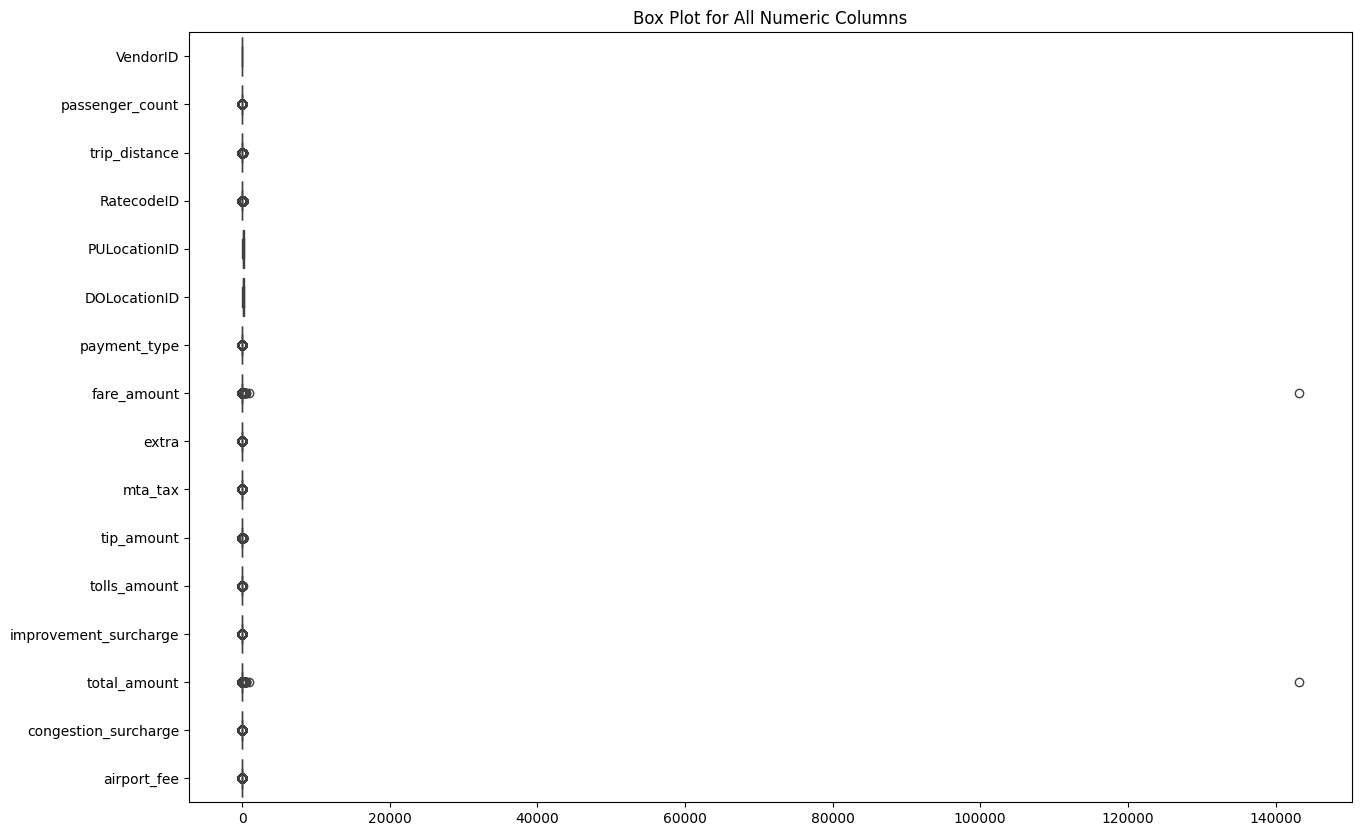

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')


In [32]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

numeric_columns = clr_df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10)) 
sns.boxplot(data=clr_df[numeric_columns], orient='h') 

# Display the plot
plt.title('Box Plot for All Numeric Columns')
plt.show()
print(numeric_columns)


In [33]:
clr_df['total_amount'].describe()

count    289888.000000
mean         29.337757
std         266.836579
min           0.000000
25%          15.960000
50%          21.000000
75%          30.620000
max      143167.450000
Name: total_amount, dtype: float64

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [34]:
# remove passenger_count > 6
clr_df = clr_df[clr_df['passenger_count'] <= 6]
clr_df_bkp = clr_df
clr_df.shape

(289883, 18)

In [35]:
# Continue with outlier handling


## Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
clr_df = clr_df[~(clr_df['trip_distance'].abs() < 0.1)]
## Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
clr_df = clr_df[~((clr_df['trip_distance'] == 0) & (clr_df['fare_amount'] == 0) & (clr_df['PULocationID'] != clr_df['DOLocationID']))]

## Entries where `trip_distance` is more than 250  miles.
clr_df = clr_df[clr_df['trip_distance'] < 250]
clr_df = clr_df[((clr_df['fare_amount'] < 300) & (clr_df['total_amount'] < 300))]

## Entries where `payment_type` is 0, replacing with 5 which is 'unknown'
clr_df['payment_type'] = clr_df['payment_type'].replace(0, 5)

clr_df = clr_df[(clr_df['VendorID'] == 1) | (clr_df['VendorID'] == 2)]
clr_df = clr_df[clr_df['trip_distance'] < 60]
clr_df = clr_df[clr_df['tip_amount'] < 100]
clr_df = clr_df[clr_df['total_amount'] > 0]

clr_df = clr_df.reset_index(drop=True)

In [36]:
clr_df.shape

(285577, 18)

In [37]:
# Do any columns need standardising?
clr_df['tpep_pickup_datetime'] = pd.to_datetime(clr_df['tpep_pickup_datetime'], errors='coerce')
clr_df['tpep_dropoff_datetime'] = pd.to_datetime(clr_df['tpep_dropoff_datetime'], errors='coerce')
clr_df = clr_df[clr_df['tpep_pickup_datetime'] != clr_df['tpep_dropoff_datetime']]
clr_df['pickup_hour'] = clr_df['tpep_pickup_datetime'].dt.hour
clr_df['pickup_days'] = clr_df['tpep_pickup_datetime'].dt.day
clr_df['pickup_month'] = clr_df['tpep_pickup_datetime'].dt.month
 
## Calculate the travel time by subtracting pickup from dropoff
clr_df['travel_duration'] = clr_df['tpep_dropoff_datetime'] - clr_df['tpep_pickup_datetime']
clr_df['travel_duration'] = clr_df['travel_duration'].apply(lambda x: str(x).split()[2])
clr_df['travel_duration'] = pd.to_timedelta(clr_df['travel_duration'])

clr_df = clr_df[clr_df['travel_duration'].dt.total_seconds() / 60 < 200]
clr_df = clr_df.reset_index(drop=True)
clr_df.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
2         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
3         2  2023-12-01 00:57:08   2023-12-01 01:05:49              1.0   
4         2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   
5         2  2023-12-01 00:01:25   2023-12-01 00:07:45              1.0   
6         2  2023-12-01 00:14:06   2023-12-01 00:18:02              1.0   
7         1  2023-12-01 00:18:54   2023-12-01 00:27:04              1.0   
8         1  2023-12-01 00:39:40   2023-12-01 00:54:17              1.0   
9         2  2023-12-01 00:06:42   2023-12-01 00:18:36              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           3.99         1.0           148            50             1   
1           1.05         1.0           161           161             1   
2           0.40         1.0            68            68             1   
3           1.66         1.0           114           186             1   
4           2.45         1.0           164           232             1   
5           1.08         1.0           114           231             1   
6           1.37         1.0           239            24             1   
7           1.10         5.0           231            87             1   
8           2.70         1.0           158           261             1   
9           2.58         1.0           164           236             1   

   fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
0         23.3  ...        5.66           0.0                    1.0   
1         10.7  ...        3.14           0.0                    1.0   
2          5.1  ...        0.00           0.0                    1.0   
3         10.7  ...        3.14           0.0                    1.0   
4         14.9  ...        1.00           0.0                    1.0   
5          8.6  ...        2.00           0.0                    1.0   
6          7.9  ...        2.58           0.0                    1.0   
7         11.0  ...        2.00           0.0                    1.0   
8         16.3  ...        4.25           0.0                    1.0   
9         14.9  ...        2.00           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_hour  pickup_days  \
0         33.96                   2.5          0.0            0            1   
1         18.84                   2.5          0.0            0            1   
2         10.10                   2.5          0.0            0            1   
3         18.84                   2.5          0.0            0            1   
4         20.90                   2.5          0.0            0            1   
5         15.60                   2.5          0.0            0            1   
6         15.48                   2.5          0.0            0            1   
7         14.00                   0.0          0.0            0            1   
8         25.55                   2.5          0.0            0            1   
9         21.90                   2.5          0.0            0            1   

   pickup_month  travel_duration  
0            12  0 days 00:22:21  
1            12  0 days 00:10:38  
2            12  0 days 00:03:10  
3            12  0 days 00:08:41  
4            12  0 days 00:13:01  
5            12  0 days 00:06:20  
6            12  0 days 00:03:56  
7            12  0 days 00:08:10  
8            12  0 days 00:14:37  
9            12  0 days 00:11:54  

[10 rows x 22 columns]

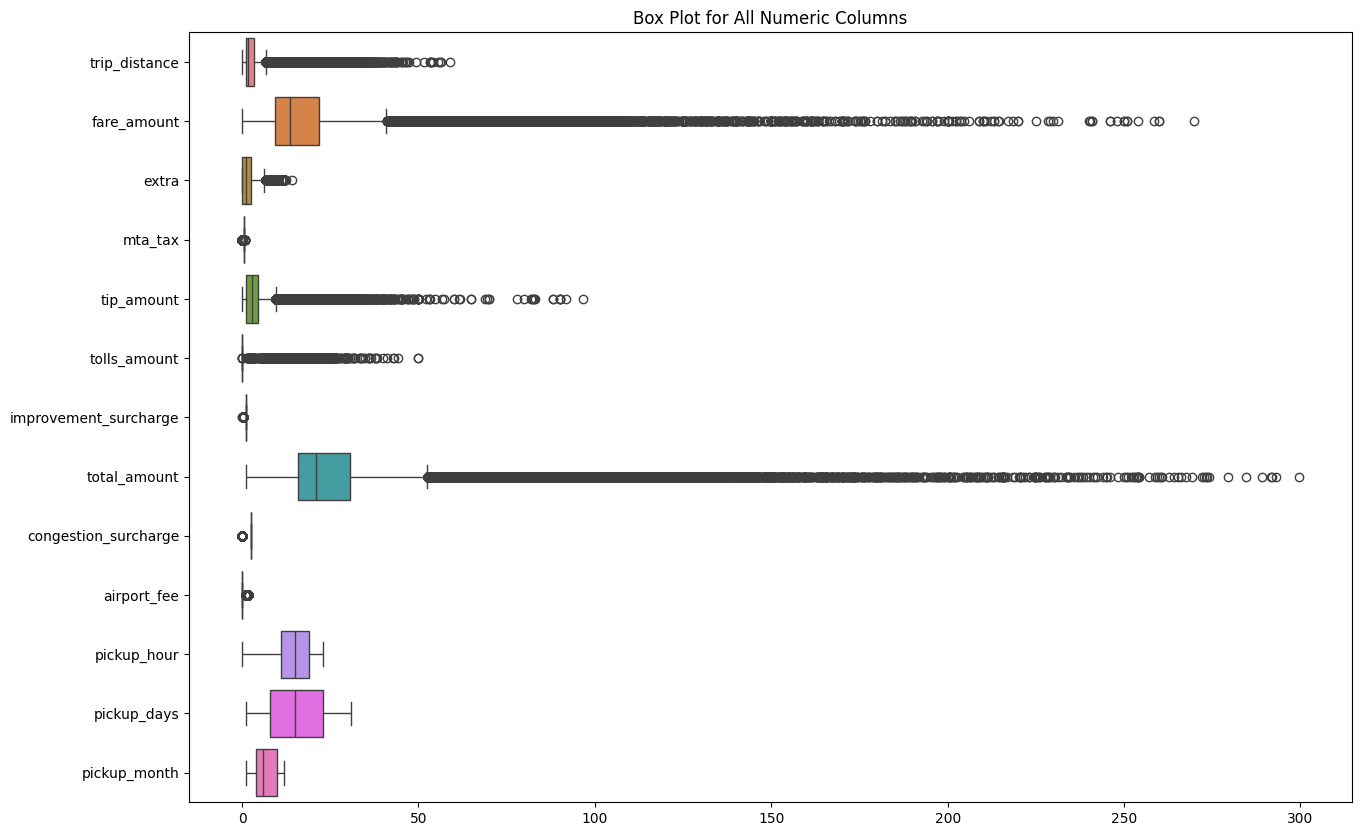

In [ ]:


numeric_columns1 = ['trip_distance', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_hour',
       'pickup_days', 'pickup_month']
plt.figure(figsize=(15, 10)) 
sns.boxplot(data=clr_df[numeric_columns1], orient='h') 

# Display the plot
plt.title('Box Plot for All Numeric Columns')
plt.show()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [38]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:  Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`:  Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra` : Numerical
* `mta_tax`: Numerical
* `tip_amount` : Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

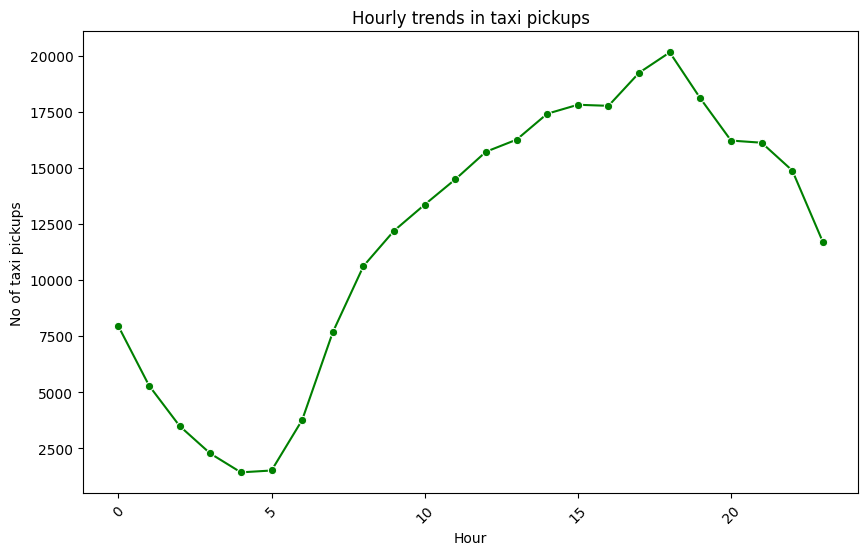

In [39]:
# Find and show the hourly trends in taxi pickups
value_counts = clr_df['pickup_hour'].value_counts()

plt.figure(figsize=(10, 6))
#sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
sns.lineplot(x=value_counts.index, y=value_counts.values, marker='o', color='g')
plt.title('Hourly trends in taxi pickups')
plt.xlabel('Hour')
plt.ylabel('No of taxi pickups')
plt.xticks(rotation=45)
plt.show()


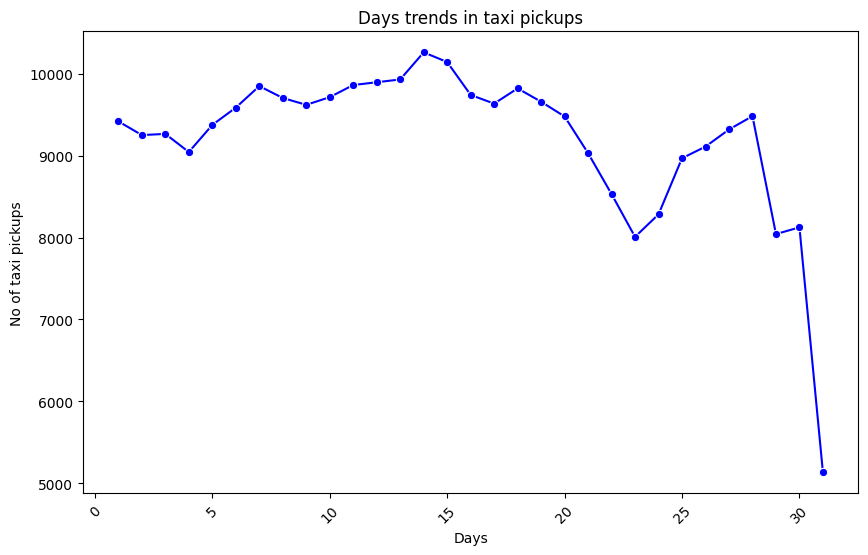

In [40]:
# Find and show the daily trends in taxi pickups (days of the week)
value_counts = clr_df['pickup_days'].value_counts()

plt.figure(figsize=(10, 6))
sns.lineplot(x=value_counts.index, y=value_counts.values, marker='o', color='b')

plt.title('Days trends in taxi pickups')
plt.xlabel('Days')
plt.ylabel('No of taxi pickups')
plt.xticks(rotation=45)
plt.show()


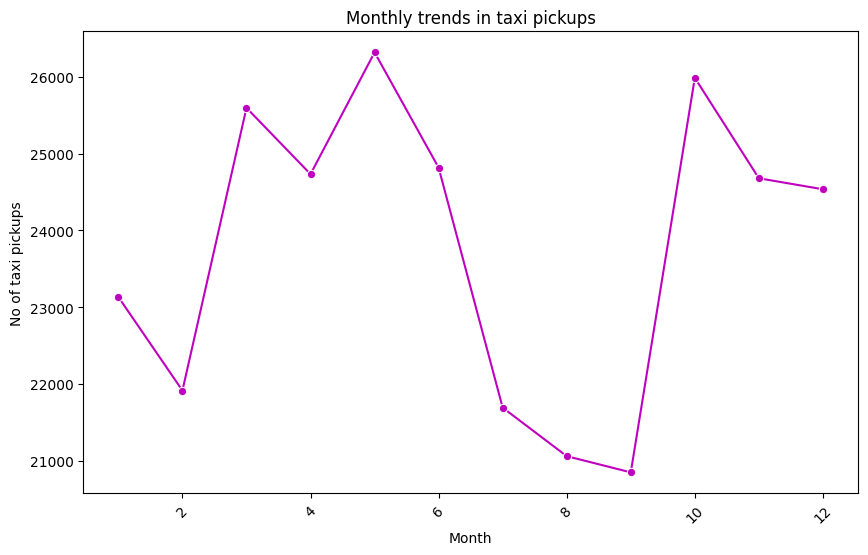

In [41]:
# Show the monthly trends in pickups

value_counts = clr_df['pickup_month'].value_counts()

plt.figure(figsize=(10, 6))
sns.lineplot(x=value_counts.index, y=value_counts.values, marker='o', color='m')

plt.title('Monthly trends in taxi pickups')
plt.xlabel('Month')
plt.ylabel('No of taxi pickups')
plt.xticks(rotation=45)
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [42]:
# Analyse the above parameters
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
for column in columns_to_check:
    count_negative_or_zero = (clr_df[column] <= 0).sum()
    print(f"Number of negative or zero values in {column}: {count_negative_or_zero}")

clr_df.shape

Number of negative or zero values in fare_amount: 33
Number of negative or zero values in tip_amount: 61976
Number of negative or zero values in total_amount: 0
Number of negative or zero values in trip_distance: 0


(285310, 22)

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [43]:
# Create a df with non zero entries for the selected parameters.

## As Tip is not mandetory for all the rides so we can consider "0" so excluding 'tip_amount' from the list to check '0'
columns_to_check = ['fare_amount', 'total_amount', 'trip_distance']
df_nz = clr_df[(clr_df[columns_to_check] > 0).all(axis=1)]

# Iterate over the columns and count negative or zero values
for column in columns_to_check:
    count_negative_or_zero = (df_nz[column] == 0).sum()
    print(f"Number of negative or zero values in {column}: {count_negative_or_zero}")

df_nz.shape

Number of negative or zero values in fare_amount: 0
Number of negative or zero values in total_amount: 0
Number of negative or zero values in trip_distance: 0


(285277, 22)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [44]:
# Group data by month and analyse monthly revenue

monthly_revenue = df_nz.groupby('pickup_month')['total_amount'].sum().reset_index()
monthly_revenue = monthly_revenue.sort_values(by='pickup_month')
print(monthly_revenue)



    pickup_month  total_amount
0              1     631533.46
1              2     597899.45
2              3     719090.55
3              4     701437.55
4              5     769080.56
5              6     722894.01
6              7     620413.27
7              8     606100.87
8              9     624633.11
9             10     770576.38
10            11     710556.52
11            12     704747.87


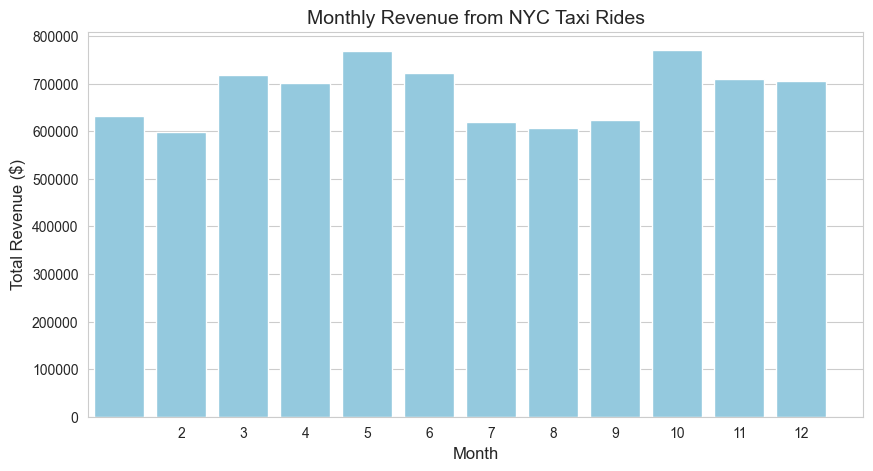

In [45]:
sns.set_style("whitegrid")


plt.figure(figsize=(10,5))
sns.barplot(x=monthly_revenue['pickup_month'], y=monthly_revenue['total_amount'], color='skyblue')


plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.title("Monthly Revenue from NYC Taxi Rides", fontsize=14)
plt.xticks(range(1, 13)) 

plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [46]:
# Calculate proportion of each quarter

df_nz['quarter'] = df_nz['tpep_pickup_datetime'].dt.to_period('Q')

quarterly_revenue = df_nz.groupby('quarter')['total_amount'].sum().reset_index()
total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue *100
quarterly_revenue = quarterly_revenue.sort_values(by='quarter')

print(quarterly_revenue)

  quarter  total_amount  proportion
0  2023Q1    1948523.46   23.823599
1  2023Q2    2193412.12   26.817727
2  2023Q3    1851147.25   22.633030
3  2023Q4    2185880.77   26.725645


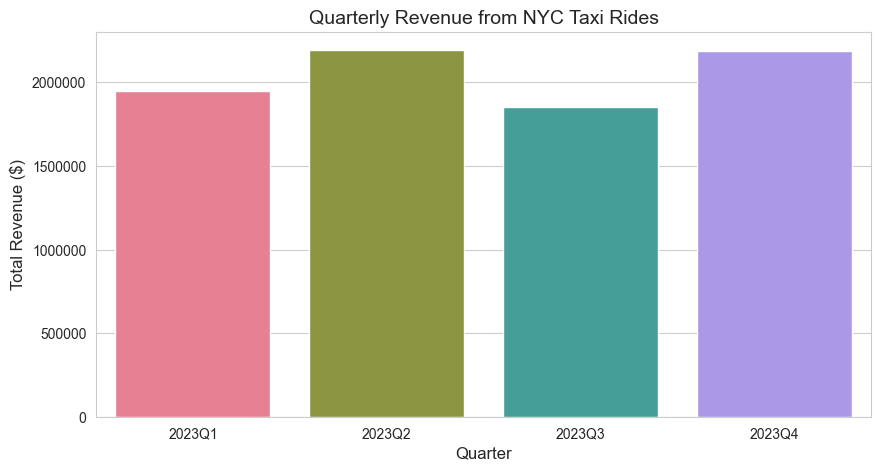

In [47]:

num_bars = len(quarterly_revenue)
colors = sns.color_palette("husl", num_bars)  # Generates unique colors dynamically

# Create the figure and axis
plt.figure(figsize=(10, 5))

# Bar plot with dynamic colors
sns.barplot(x=quarterly_revenue['quarter'].astype(str), 
            y=quarterly_revenue['total_amount'], 
            palette=colors)

# Labels and Title
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.title("Quarterly Revenue from NYC Taxi Rides", fontsize=14)

# Display full amounts on Y-axis
plt.ticklabel_format(style='plain', axis='y')  # Prevents scientific notation
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

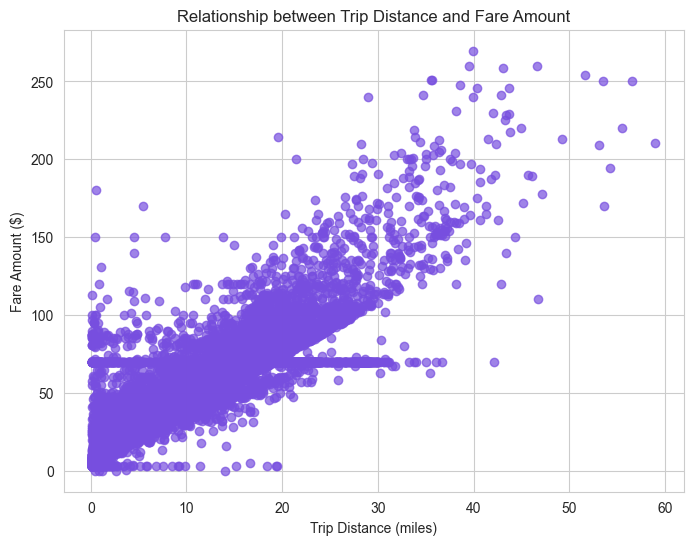

Correlation between trip_distance and fare_amount: 0.96


In [48]:
# Show how trip fare is affected by distance

plt.figure(figsize=(8, 6))
plt.scatter(df_nz['trip_distance'], df_nz['fare_amount'], color='#774EDF', alpha=0.7)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

## Calculate the correlation between trip_distance and fare_amount
correlation = df_nz['trip_distance'].corr(df_nz['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.2f}")

In [49]:
df_nz.shape

(285277, 23)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`|

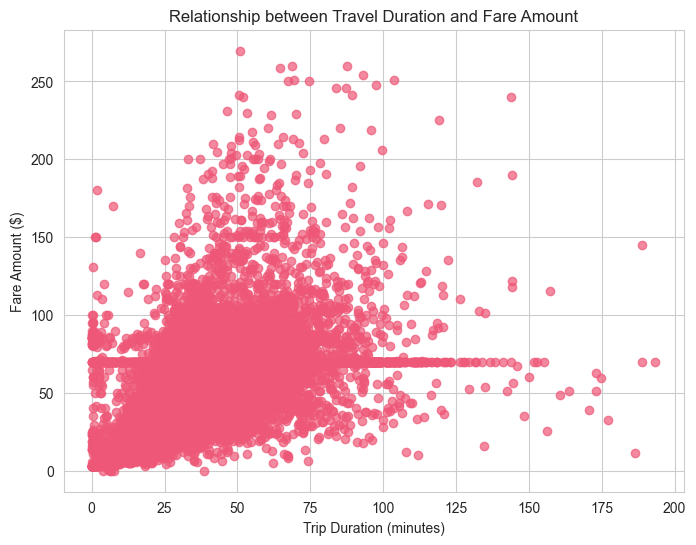

Correlation between trip_duration and fare_amount: 0.86


In [181]:
# Show relationship between fare and trip duration
df_nz['travel_duration'] = pd.to_timedelta(df_nz['travel_duration'])
plt.figure(figsize=(8, 6))
plt.scatter(df_nz['travel_duration'].dt.total_seconds()/60, df_nz['fare_amount'], color='#EE5777', alpha=0.7)
plt.title('Relationship between Travel Duration and Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

## Calculate the correlation between trip_distance and fare_amount
correlation = df_nz['travel_duration'].corr(df_nz['fare_amount'])
print(f"Correlation between trip_duration and fare_amount: {correlation:.2f}")


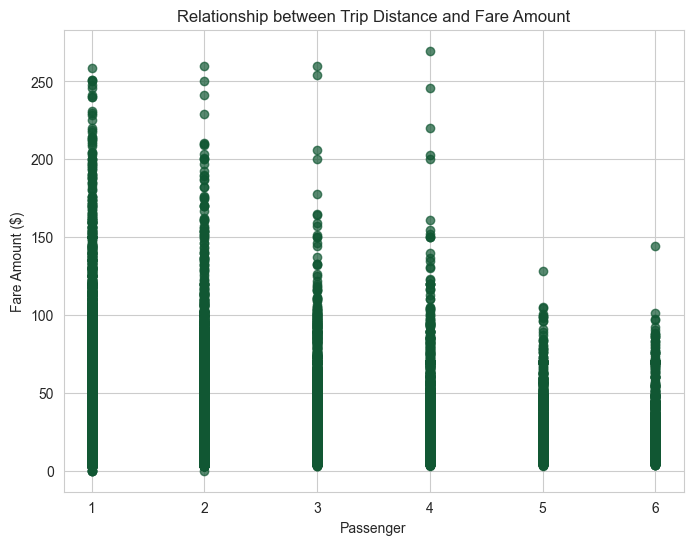

Correlation between passanger_count and fare_amount: 0.04


In [182]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(8, 6))
plt.scatter(df_nz['passenger_count'], df_nz['fare_amount'], color='#115733', alpha=0.7)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Passenger')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

# Calculate the correlation between trip_distance and fare_amount
correlation = df_nz['passenger_count'].corr(df_nz['fare_amount'])
print(f"Correlation between passanger_count and fare_amount: {correlation:.2f}")

In [50]:

df_nz_tip = df_nz[(df_nz['tip_amount'] < 40) & df_nz['tip_amount'] > 0]
df_nz_tip.shape

(223227, 23)

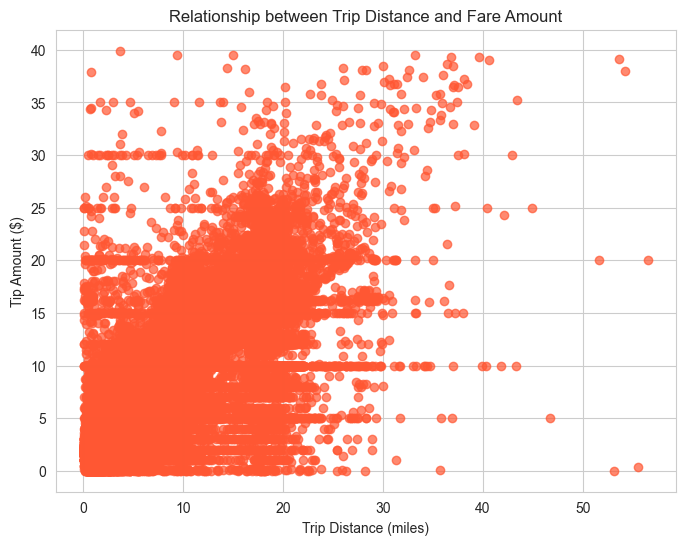

Correlation between trip_distance and tip_amount: 0.83


In [51]:
# Show relationship between tip and trip distance

plt.figure(figsize=(8, 6))
plt.scatter(df_nz_tip['trip_distance'], df_nz_tip['tip_amount'], color='#FF5733', alpha=0.7)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

# Calculate the correlation between trip_distance and fare_amount
correlation = df_nz_tip['trip_distance'].corr(df_nz_tip['tip_amount'])
print(f"Correlation between trip_distance and tip_amount: {correlation:.2f}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    233625
2     48851
4      1821
3       980
Name: count, dtype: int64


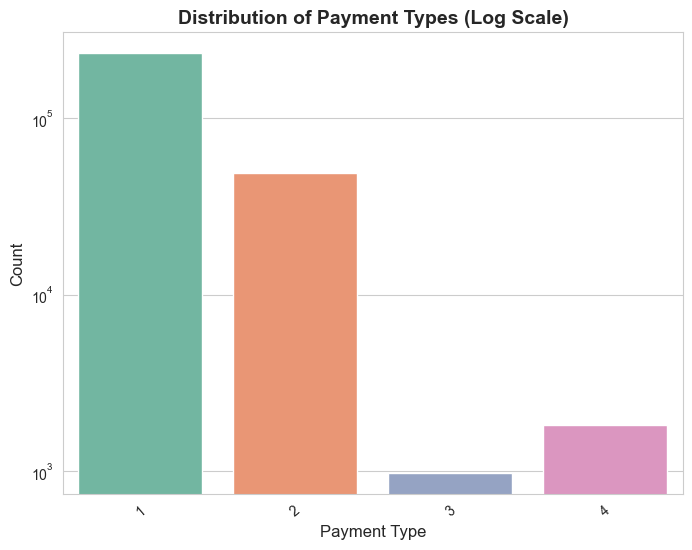

In [52]:
# Analyse the distribution of different payment types (payment_type).

payment_type_counts = df_nz['payment_type'].value_counts()
print(payment_type_counts)  
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='Set2')

plt.yscale("log")  
plt.title('Distribution of Payment Types (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=40, fontsize=10)

plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [204]:
pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------- ----------------------------- 4.2/16.2 MB 29.3 MB/s eta 0:00:01
   ---------- ----------------------------- 4.2/16.2 MB 29.3 MB/s eta 0:00:01
   ---------- ----------------------------- 4.2/16.2 MB 29.3 MB/s eta 0:00:01
   ---------- ----------------------------- 4.2/16.2 MB 29.3 MB/s eta 0:00:01
   ------------ --------------------------- 5.2/16.2 MB 5.9 MB/s eta 0:00:02
   ------------------ --------------------- 7.3/16.2 MB 6.0 MB/s eta 0:00:02
   ---------------------- ----------------- 8.9/16.2 MB 6.2 MB/s eta 0:00:02
   ----------------------- ---------------- 9.4/16.2 MB 6.3 MB/s eta 0:00:02
   ----------------------- ---------------- 9.4/16.2 MB 6.3 MB/s eta 0:00:02
   ----------------------- ---------------- 9.4/16.2 MB 6.3 MB/s eta 0:00:02
   ---------------------------- ----------- 11.5/16.2 MB 5.1 MB/s eta 0:00:01
   ---------------------------- ----------- 11.5/16.2 MB 5.1 MB/s eta 0:00:01


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [53]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones.shp')          # read the .shp file using gpd
zones.head(10)

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   
5         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
6         7    0.107417    0.000390                  Astoria           7   
7         8    0.027591    0.000027             Astoria Park           8   
8         9    0.099784    0.000338               Auburndale           9   
9        10    0.099839    0.000436             Baisley Park          10   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  
5  Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...  
6         Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...  
7         Queens  POLYGON ((1005482.276 221686.466, 1005304.898 ...  
8         Queens  POLYGON ((1043803.993 216615.925, 1043849.708 ...  
9         Queens  POLYGON ((1044355.072 190734.321, 1044612.122 ...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


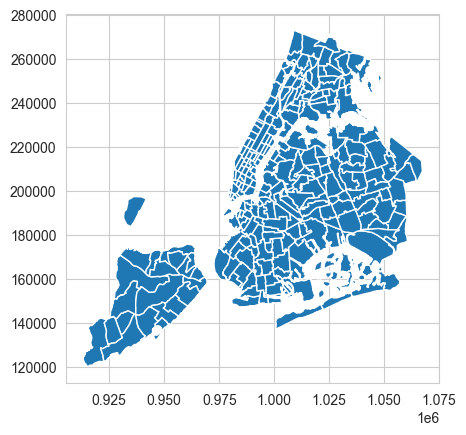

<Figure size 1000x800 with 0 Axes>

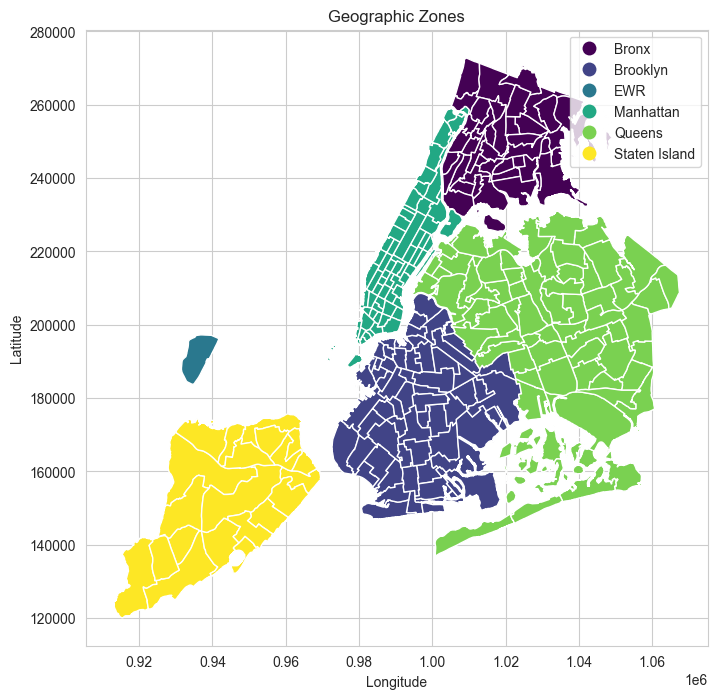

In [54]:
print(zones.info())
zones.plot()
plt.figure(figsize=(10, 8))
zones.plot(column='borough', legend=True, cmap='viridis', figsize=(10, 8)) 
plt.title('Geographic Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [63]:
# Merge zones and trip records using locationID and PULocationID

df_geo = pd.merge(df_nz, zones, left_on='PULocationID', right_on='LocationID', how='left')

print(df_geo.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
2         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
3         2  2023-12-01 00:57:08   2023-12-01 01:05:49              1.0   
4         2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           3.99         1.0           148            50             1   
1           1.05         1.0           161           161             1   
2           0.40         1.0            68            68             1   
3           1.66         1.0           114           186             1   
4           2.45         1.0           164           232             1   

   fare_amount  ...  pickup_month  travel_duration  quarter  OBJECTID  \
0         23.3  ...            

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [64]:
# Group data by location and calculate the number of trips
trips_by_location = df_geo.groupby('LocationID').size().reset_index(name='num_trips')

trips_by_location.head(10)


LocationID  num_trips
0         3.0          8
1         4.0        277
2         5.0          2
3         6.0          3
4         7.0        117
5         9.0          3
6        10.0         82
7        11.0          6
8        12.0        125
9        13.0       1637

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [65]:
# Merge trip counts back to the zones GeoDataFrame

zones_merged = zones.merge(trips_by_location, left_on='LocationID', right_on='LocationID', how='left')

print(zones_merged[['LocationID', 'zone', 'borough', 'num_trips']].head())


   LocationID                     zone        borough  num_trips
0           1           Newark Airport            EWR        NaN
1           2              Jamaica Bay         Queens        NaN
2           3  Allerton/Pelham Gardens          Bronx        8.0
3           4            Alphabet City      Manhattan      277.0
4           5            Arden Heights  Staten Island        2.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

14839.0
1.0


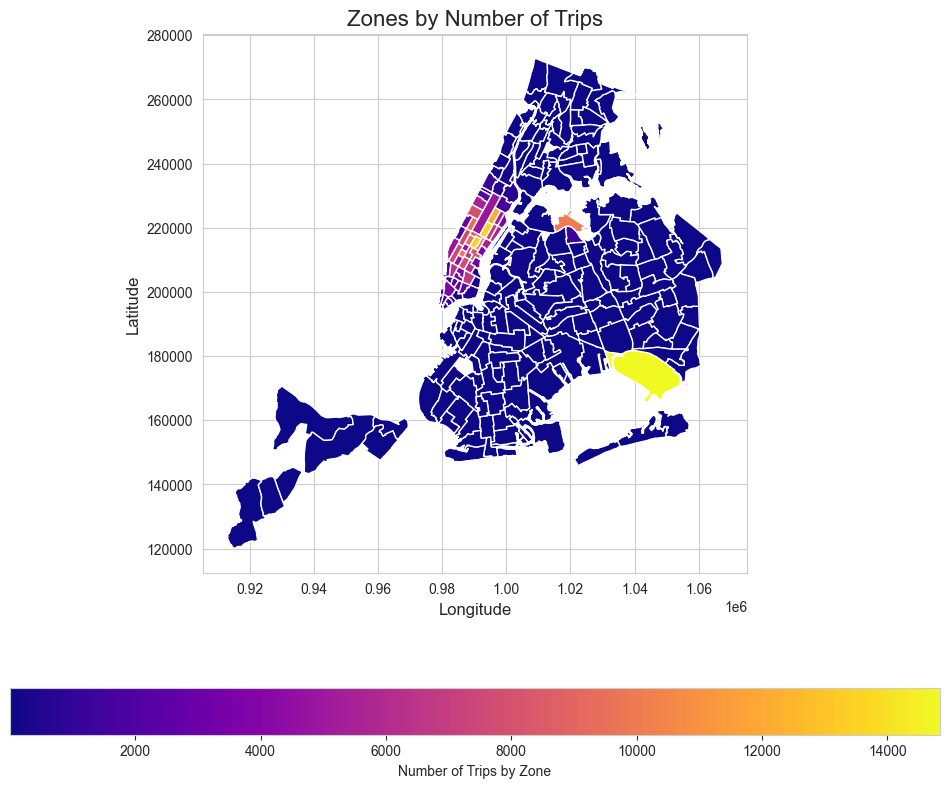

In [66]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

print(zones_merged['num_trips'].max())
print(zones_merged['num_trips'].min())


# Plot the zones with the number of trips as the color map
zones_merged.plot(column='num_trips', 
                ax=ax, 
                legend=True, 
                cmap='plasma',   # You can choose other color maps like 'plasma', 'coolwarm', etc.
                legend_kwds={'label': "Number of Trips by Zone", 'orientation': "horizontal"})

# Customize plot labels and title
ax.set_title('Zones by Number of Trips', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Show the plot
plt.show()



In [67]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones_merged.sort_values(by='num_trips', ascending=False)

# 
print(sorted_zones[['LocationID', 'zone', 'borough', 'num_trips']].head(10))


     LocationID                          zone    borough  num_trips
131         132                   JFK Airport     Queens    14839.0
236         237         Upper East Side South  Manhattan    13609.0
160         161                Midtown Center  Manhattan    13431.0
235         236         Upper East Side North  Manhattan    12166.0
161         162                  Midtown East  Manhattan    10411.0
137         138             LaGuardia Airport     Queens     9976.0
185         186  Penn Station/Madison Sq West  Manhattan     9840.0
229         230     Times Sq/Theatre District  Manhattan     9558.0
141         142           Lincoln Square East  Manhattan     9444.0
169         170                   Murray Hill  Manhattan     8444.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [68]:
# Check for zero or negative travel durations
df_geo[df_geo["travel_duration"].dt.total_seconds() <= 0].shape


(0, 30)

In [69]:
#Find routes which have the slowest speeds at different times of the day
df5 = df_geo


df5['pickup_datetime'] = pd.to_datetime(df5['tpep_pickup_datetime'], errors='coerce')
df5['dropoff_datetime'] = pd.to_datetime(df5['tpep_dropoff_datetime'], errors='coerce')

df5['travel_duration'] = (df5['dropoff_datetime'] - df5['pickup_datetime']).dt.total_seconds() / 3600  # in hours
df5 = df5[df5['travel_duration'] > 0]  # Remove trips with zero or negative duration

df5 = df5[df5['trip_distance'] > 0]  # Remove trips with zero or negative distance
df5['speed'] = df5['trip_distance'] / df5['travel_duration']  # Speed in miles per hour

df5['pickup_hour'] = df5['pickup_datetime'].dt.hour

avg_speed_per_hour = df5.groupby(['pickup_hour', 'PULocationID', 'DOLocationID'])['speed'].mean().reset_index()
slowest_routes_per_hour = avg_speed_per_hour.loc[avg_speed_per_hour.groupby('pickup_hour')['speed'].idxmin()]

print(slowest_routes_per_hour)


       pickup_hour  PULocationID  DOLocationID     speed
1211             0           140           264  1.865285
2791             1            41           166  1.161290
6209             2           232           148  3.638298
7171             3           152           116  3.702602
7768             4            18           174  1.199001
9408             5           230           230  0.365070
10572            6           185           168  0.825057
11553            7            97            97  0.978261
14031            8           127            75  0.767918
15848            9            14           125  0.732771
21363           10           264           230  0.941792
23492           11           220           236  0.096878
24841           12            75           254  0.855446
27496           13            42           191  0.495413
31409           14           129           129  0.946479
34732           15           134           265  0.073831
37529           16            9

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

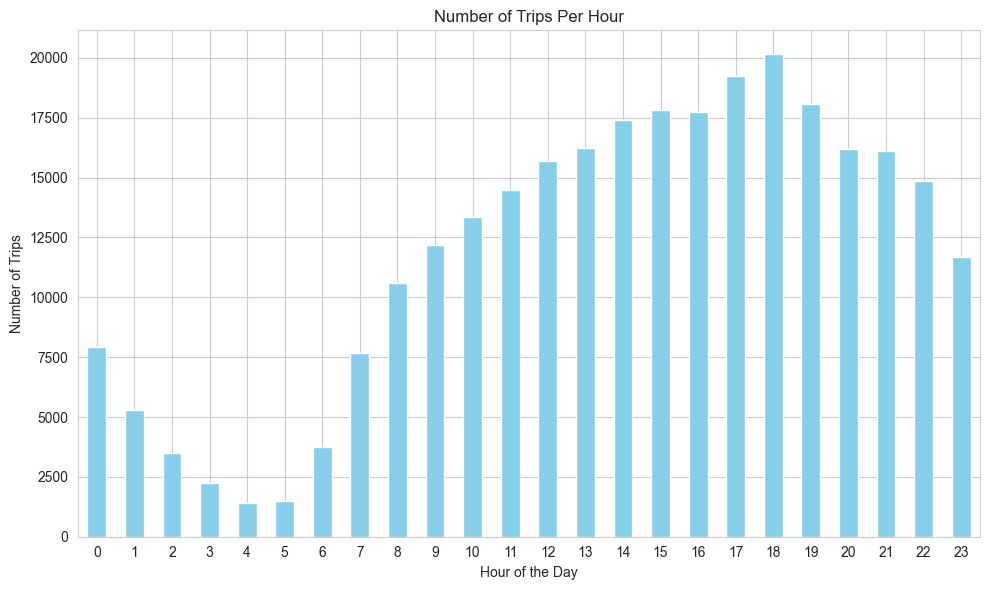

The busiest hour is: 18 with 20147 trips.


In [70]:
# Visualise the number of trips per hour and find the busiest hour


df5['pickup_hour'] = df5['pickup_datetime'].dt.hour
trips_per_hour = df5.groupby('pickup_hour').size()

plt.figure(figsize=(10, 6))
trips_per_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Trips Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()
print(f"The busiest hour is: {busiest_hour} with {trips_per_hour.max()} trips.")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [59]:
df5.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_hour', 'pickup_days',
       'pickup_month', 'travel_duration', 'quarter', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry',
       'pickup_datetime', 'dropoff_datetime', 'speed'],
      dtype='object')

In [71]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = round(100/0.7908)
busiest_hours = df5.groupby('pickup_hour').size().sort_values(ascending=False)

# Display the results
print("Busiest Hours:")
print(busiest_hours.head()* sample_fraction)


Busiest Hours:
pickup_hour
18    2538522
17    2423988
19    2279592
15    2243682
16    2237886
dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

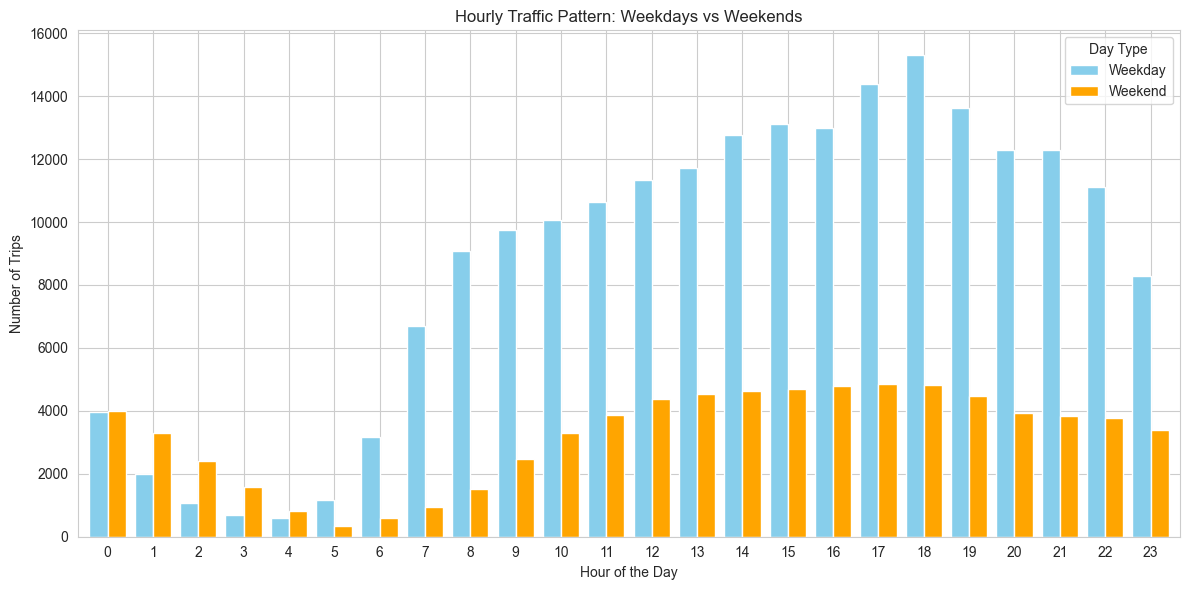

The busiest hour on weekdays is: 18 with 15323 trips.
The busiest hour on weekends is: 17 with 4846 trips.


In [61]:
# Compare traffic trends for the week days and weekends


df5['day_of_week'] = df5['tpep_pickup_datetime'].dt.weekday

# Define weekdays (0-4) and weekends (5-6)
df5['day_type'] = df5['day_of_week'].apply(lambda x: 'Weekday' if x <= 4 else 'Weekend')

# Calculate the number of trips per hour for weekdays and weekends
trips_per_hour_by_day_type = df5.groupby(['pickup_hour', 'day_type']).size().unstack(fill_value=0)

# Plot the comparison of trips per hour for weekdays and weekends
plt.figure(figsize=(12, 6))

# Plotting for weekdays and weekends side by side
trips_per_hour_by_day_type.plot(kind='bar', width=0.8, color=['skyblue', 'orange'], ax=plt.gca())

plt.title('Hourly Traffic Pattern: Weekdays vs Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.legend(title="Day Type", loc='upper right')
plt.tight_layout()
plt.show()

# Find the busiest hours for weekdays and weekends
busiest_weekday_hour = trips_per_hour_by_day_type['Weekday'].idxmax()
busiest_weekend_hour = trips_per_hour_by_day_type['Weekend'].idxmax()

print(f"The busiest hour on weekdays is: {busiest_weekday_hour} with {trips_per_hour_by_day_type['Weekday'].max()} trips.")
print(f"The busiest hour on weekends is: {busiest_weekend_hour} with {trips_per_hour_by_day_type['Weekend'].max()} trips.")


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

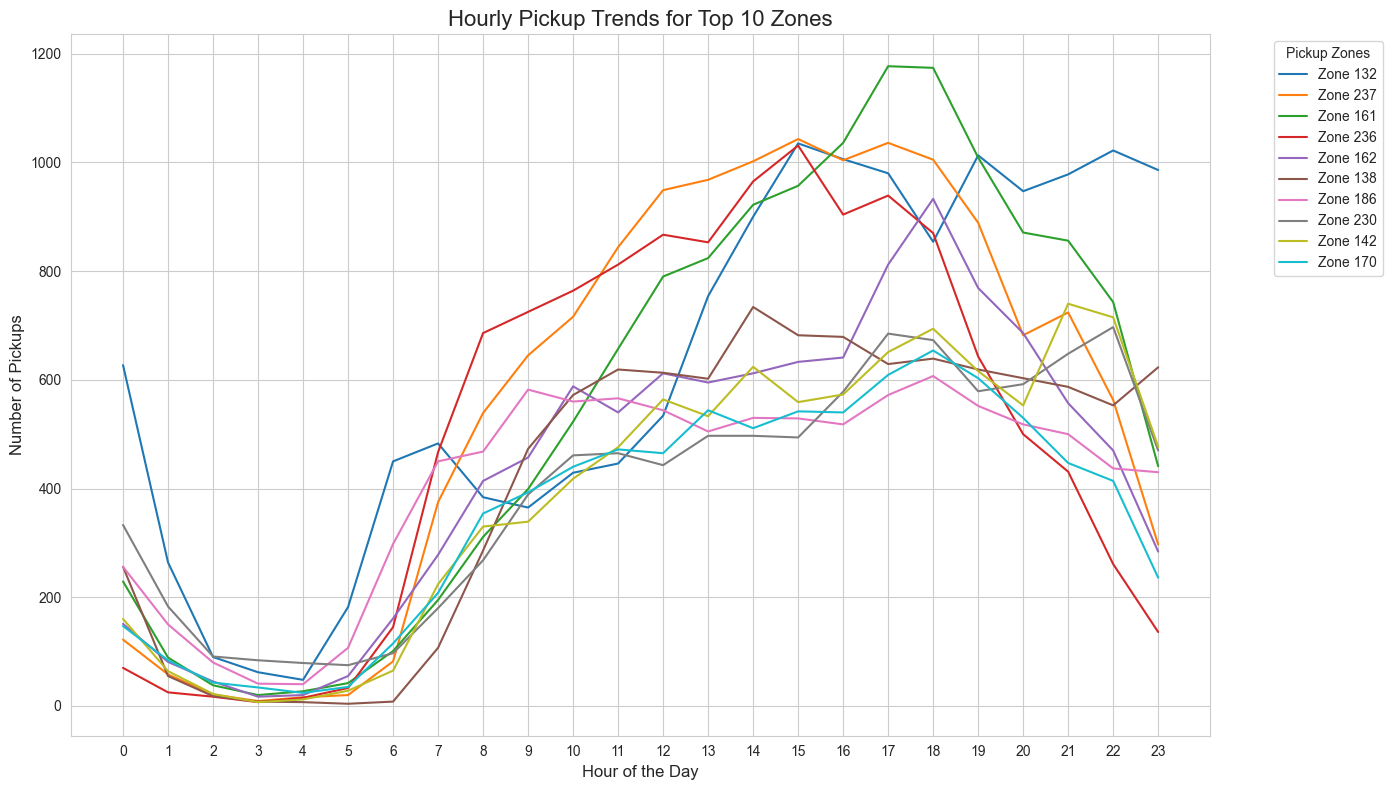

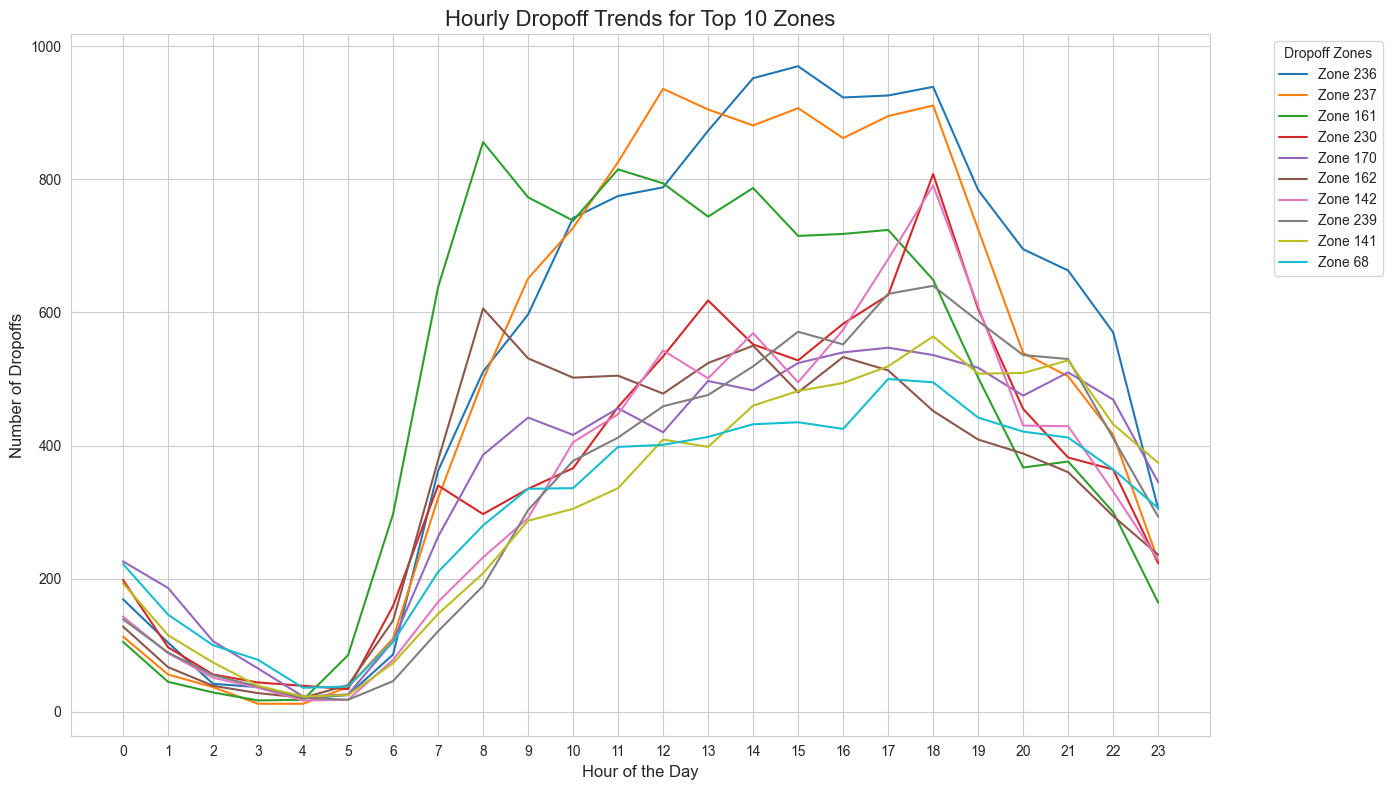

In [72]:
# Find top 10 pickup and dropoff zones

pickup_trends = df5.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')
top_pickup_zones = pickup_trends.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index
top_pickup_trends = pickup_trends[pickup_trends['PULocationID'].isin(top_pickup_zones)]
plt.figure(figsize=(14, 8))
for zone in top_pickup_zones:
    zone_data = top_pickup_trends[top_pickup_trends['PULocationID'] == zone]
    plt.plot(zone_data['pickup_hour'], zone_data['pickup_count'], label=f"Zone {zone}")

plt.title('Hourly Pickup Trends for Top 10 Zones', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.legend(title='Pickup Zones', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(24))  
plt.grid(True)
plt.tight_layout()
plt.show()


dropoff_trends = df5.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='dropoff_count')
top_dropoff_zones = dropoff_trends.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index
top_dropoff_trends = dropoff_trends[dropoff_trends['DOLocationID'].isin(top_dropoff_zones)]
plt.figure(figsize=(14, 8))
for zone in top_dropoff_zones:
    zone_data = top_dropoff_trends[top_dropoff_trends['DOLocationID'] == zone]
    plt.plot(zone_data['pickup_hour'], zone_data['dropoff_count'], label=f"Zone {zone}")

plt.title('Hourly Dropoff Trends for Top 10 Zones', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Dropoffs', fontsize=12)
plt.legend(title='Dropoff Zones', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(24))  
plt.grid(True)
plt.tight_layout()
plt.show()





**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [73]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df5.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_counts = df5.groupby('DOLocationID').size().reset_index(name='dropoff_count')
zone_counts = pd.merge(pickup_counts, dropoff_counts, left_on='PULocationID', right_on='DOLocationID', how='outer')
zone_counts['pickup_to_dropoff_ratio'] = round(zone_counts['pickup_count'] / zone_counts['dropoff_count'], 2)

top_10_highest_ratio = zone_counts.nlargest(10, 'pickup_to_dropoff_ratio')

top_10_lowest_ratio = zone_counts.nsmallest(10, 'pickup_to_dropoff_ratio')

print("Top 10 Zones with the Highest Pickup to Dropoff Ratio:")
print(top_10_highest_ratio[['PULocationID', 'pickup_to_dropoff_ratio']])

print("\nTop 10 Zones with the Lowest Pickup to Dropoff Ratio:")
print(top_10_lowest_ratio[['PULocationID', 'pickup_to_dropoff_ratio']])




Top 10 Zones with the Highest Pickup to Dropoff Ratio:
     PULocationID  pickup_to_dropoff_ratio
68           70.0                     9.74
124         132.0                     5.10
130         138.0                     2.97
177         186.0                     1.54
41           43.0                     1.38
238         249.0                     1.36
107         114.0                     1.34
154         162.0                     1.27
97          100.0                     1.19
153         161.0                     1.19

Top 10 Zones with the Lowest Pickup to Dropoff Ratio:
     PULocationID  pickup_to_dropoff_ratio
246         257.0                     0.02
241         252.0                     0.03
254         265.0                     0.03
35           37.0                     0.04
98          101.0                     0.04
105         112.0                     0.04
125         133.0                     0.04
169         178.0                     0.04
182         192.0             

In [74]:

pickup_counts = df5.groupby('PULocationID').size()
dropoff_counts = df5.groupby('DOLocationID').size()

zone_counts = pd.DataFrame({'pickups': pickup_counts,'dropoffs': dropoff_counts}).fillna(0)

zone_counts['pickup_dropoff_ratio'] = zone_counts['pickups'] / zone_counts['dropoffs']
top_10_highest_ratios = zone_counts.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
top_10_lowest_ratios = zone_counts.sort_values('pickup_dropoff_ratio').head(10)
print("Top 10 highest pickup/dropoff ratios:")
print(top_10_highest_ratios[['pickups', 'dropoffs', 'pickup_dropoff_ratio']])

print("\nTop 10 lowest pickup/dropoff ratios:")
print(top_10_lowest_ratios[['pickups', 'dropoffs', 'pickup_dropoff_ratio']])


Top 10 highest pickup/dropoff ratios:
     pickups  dropoffs  pickup_dropoff_ratio
70    1296.0       133              9.744361
132  14839.0      2908              5.102820
138   9976.0      3360              2.969048
186   9840.0      6403              1.536780
43    4893.0      3556              1.375984
249   6374.0      4685              1.360512
114   3705.0      2767              1.338995
162  10411.0      8199              1.269789
161  13431.0     11256              1.193230
100   4674.0      3932              1.188708

Top 10 lowest pickup/dropoff ratios:
     pickups  dropoffs  pickup_dropoff_ratio
1        0.0       787                   0.0
8        0.0         5                   0.0
27       0.0         6                   0.0
30       0.0         4                   0.0
59       0.0         1                   0.0
58       0.0        10                   0.0
111      0.0         3                   0.0
128      0.0        12                   0.0
99       0.0         1  

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [75]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = df5[(df5['pickup_hour'] >= 23) | (df5['pickup_hour'] <= 5)]
pickup_counts_night = night_hours.groupby('PULocationID').size().reset_index(name='pickup_count_night')
dropoff_counts_night = night_hours.groupby('DOLocationID').size().reset_index(name='dropoff_count_night')


night_traffic = pd.merge(pickup_counts_night, dropoff_counts_night, left_on='PULocationID', right_on='DOLocationID', how='outer')

top_pickup_zones_night = night_traffic.nlargest(10, 'pickup_count_night')
top_dropoff_zones_night = night_traffic.nlargest(10, 'dropoff_count_night')

print("Top 10 Zones with High Pickup Traffic During Night Hours:")
print(top_pickup_zones_night[['PULocationID', 'pickup_count_night']])

print("\nTop 10 Zones with High Dropoff Traffic During Night Hours:")
print(top_dropoff_zones_night[['DOLocationID', 'dropoff_count_night']])


Top 10 Zones with High Pickup Traffic During Night Hours:
     PULocationID  pickup_count_night
73           79.0              2445.0
118         132.0              2259.0
224         249.0              1978.0
44           48.0              1620.0
134         148.0              1522.0
101         114.0              1335.0
205         230.0              1315.0
167         186.0              1104.0
124         138.0               971.0
148         164.0               953.0

Top 10 Zones with High Dropoff Traffic During Night Hours:
     DOLocationID  dropoff_count_night
73           79.0               1307.0
44           48.0               1104.0
154         170.0                977.0
62           68.0                926.0
96          107.0                911.0
127         141.0                843.0
238         263.0                802.0
224         249.0                734.0
83           90.0                707.0
211         236.0                702.0


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [76]:
# Filter for night hours (11 PM to 5 AM)

df5['pickup_hour'] = df5['pickup_datetime'].dt.hour

night_hours_df = df5[(df5['pickup_hour'] >= 23) | (df5['pickup_hour'] <= 5)]
day_hours_df = df5[(df5['pickup_hour'] >= 6) & (df5['pickup_hour'] <= 22)]

total_revenue = df5['total_amount'].sum()
nighttime_revenue = night_hours_df['total_amount'].sum()
daytime_revenue = day_hours_df['total_amount'].sum()

nighttime_revenue_share = (nighttime_revenue / total_revenue) * 100
daytime_revenue_share = (daytime_revenue / total_revenue) * 100

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Nighttime Revenue: ${nighttime_revenue:,.2f} ({nighttime_revenue_share:.2f}%)")
print(f"Daytime Revenue: ${daytime_revenue:,.2f} ({daytime_revenue_share:.2f}%)")


Total Revenue: $8,179,969.49
Nighttime Revenue: $984,403.83 (12.03%)
Daytime Revenue: $7,195,565.66 (87.97%)


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

Average Fare per Mile per Passenger for each passenger count:
   passenger_count  fare_per_mile_per_passenger
0              1.0                    13.086529
1              2.0                     6.331377
2              3.0                     4.206396
3              4.0                     3.278724
4              5.0                     2.507194
5              6.0                     2.086221


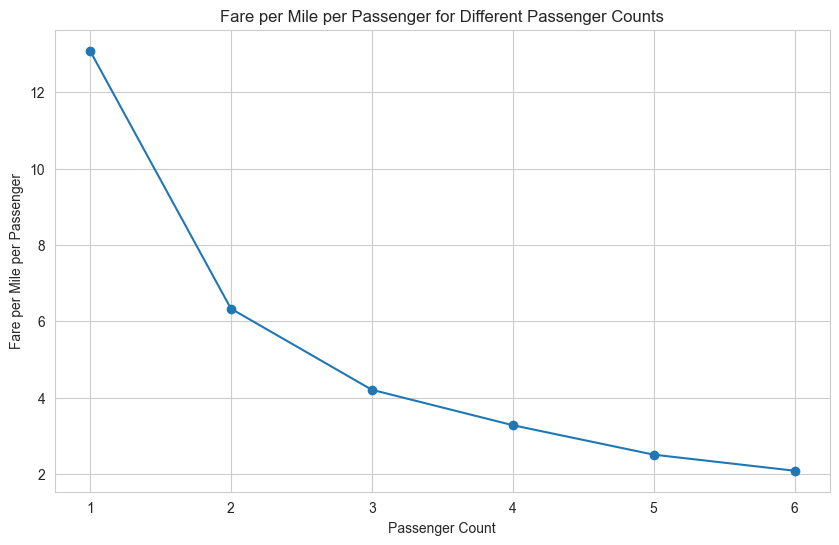

In [77]:
# Analyse the fare per mile per passenger for different passenger counts


df5['fare_per_mile'] = df5['total_amount'] / df5['trip_distance']
df5['fare_per_mile_per_passenger'] = df5['fare_per_mile'] / df5['passenger_count']
fare_per_mile_per_passenger_by_count = df5.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
print("Average Fare per Mile per Passenger for each passenger count:")
print(fare_per_mile_per_passenger_by_count)


plt.figure(figsize=(10, 6))
plt.plot(fare_per_mile_per_passenger_by_count['passenger_count'], 
         fare_per_mile_per_passenger_by_count['fare_per_mile_per_passenger'], marker='o')

plt.title('Fare per Mile per Passenger for Different Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger')
plt.grid(True)
plt.xticks(range(1, int(fare_per_mile_per_passenger_by_count['passenger_count'].max())+1))
plt.show()




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

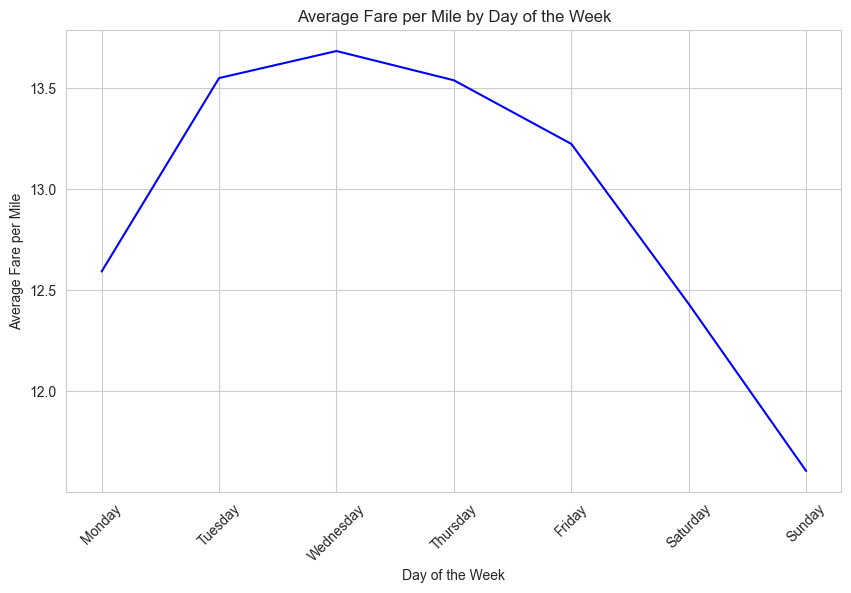

<Figure size 1000x600 with 0 Axes>

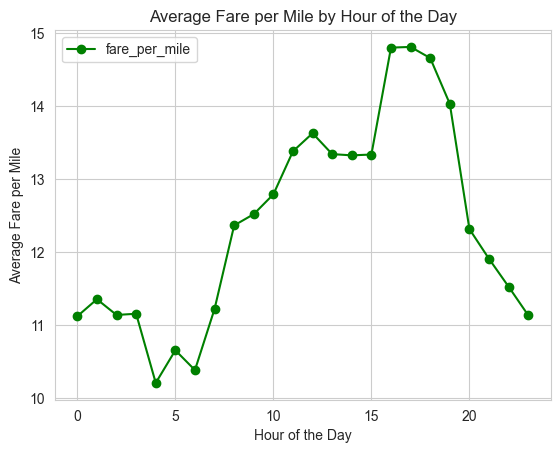

In [78]:
# Compare the average fare per mile for different days and for different times of the day
df5['day_of_week_name'] = df5['tpep_pickup_datetime'].dt.day_name()


avg_fare_day = df5.groupby('day_of_week_name')['fare_per_mile'].mean().reset_index()

avg_fare_hour = df5.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()


plt.figure(figsize=(10, 6))
avg_fare_day = avg_fare_day.set_index('day_of_week_name').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
avg_fare_day['fare_per_mile'].plot(kind='line', color='blue')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
avg_fare_hour.plot(x='pickup_hour', y='fare_per_mile', kind='line', marker='o', color='green')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.grid(True)
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

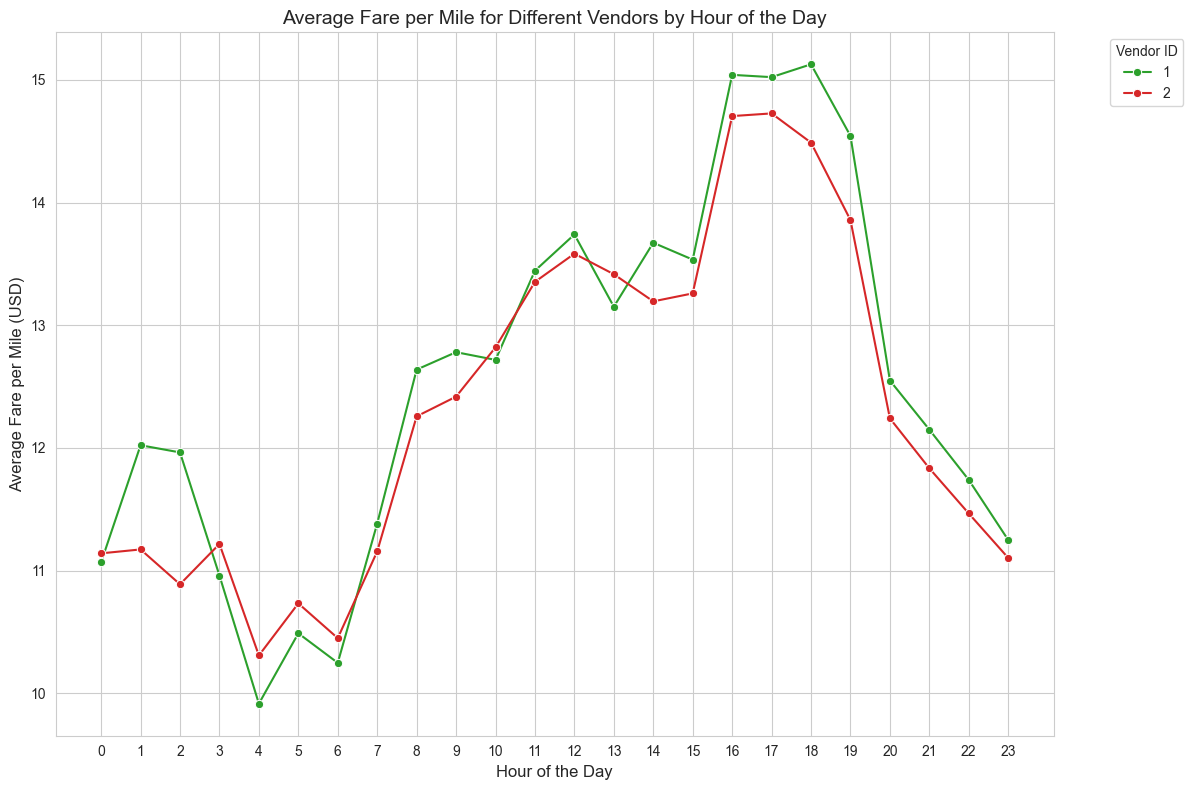

In [79]:
# Compare fare per mile for different vendors

average_fare_per_mile = df5.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

custom_palette = ['#2ca02c', '#d62728']


plt.figure(figsize=(12, 8))
sns.lineplot(data=average_fare_per_mile, x='pickup_hour', y='fare_per_mile', hue='VendorID', marker='o', palette=custom_palette)



plt.title('Average Fare per Mile for Different Vendors by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Fare per Mile (USD)', fontsize=12)
plt.xticks(range(24))  
plt.legend(title='Vendor ID', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


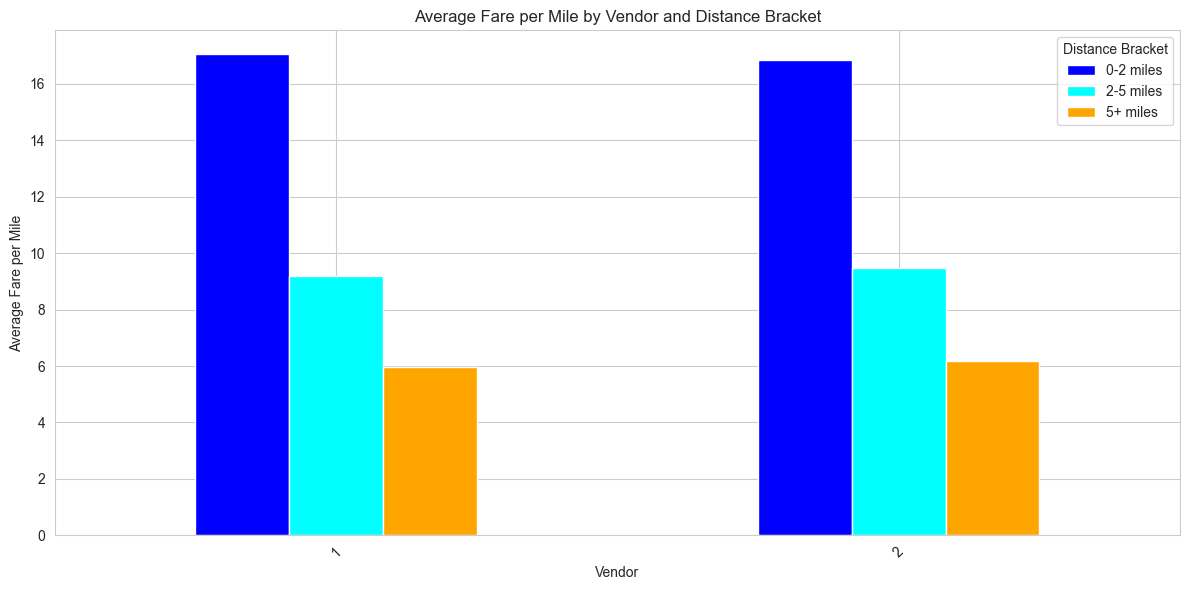

In [80]:
# Defining distance tiers

df5['distance_bracket'] = pd.cut(df5['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['0-2 miles', '2-5 miles', '5+ miles'])


avg_fare_by_vendor_and_distance = df5.groupby(['VendorID', 'distance_bracket'])['fare_per_mile'].mean().reset_index()


pivot_fare = avg_fare_by_vendor_and_distance.pivot(index='VendorID', columns='distance_bracket', values='fare_per_mile')


pivot_fare.plot(kind='bar', figsize=(12, 6), color=['blue', 'cyan', 'orange'])
plt.title('Average Fare per Mile by Vendor and Distance Bracket')
plt.xlabel('Vendor')
plt.ylabel('Average Fare per Mile')
plt.xticks(rotation=45)
plt.legend(title='Distance Bracket')
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

<Figure size 2000x600 with 0 Axes>

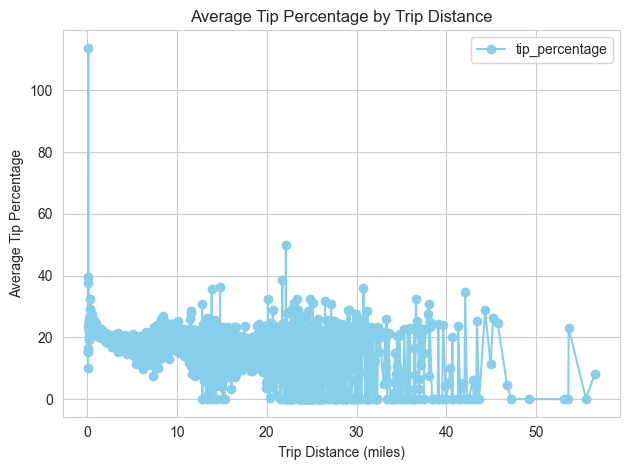

<Figure size 1000x600 with 0 Axes>

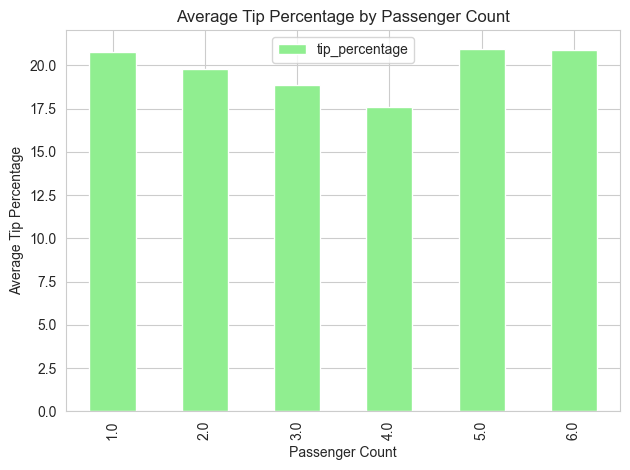

<Figure size 1000x600 with 0 Axes>

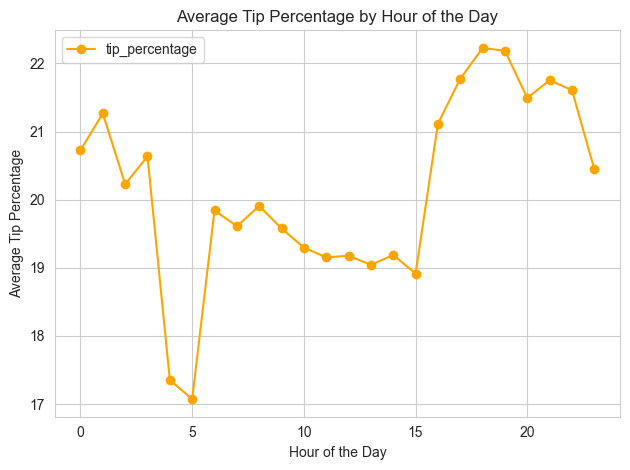

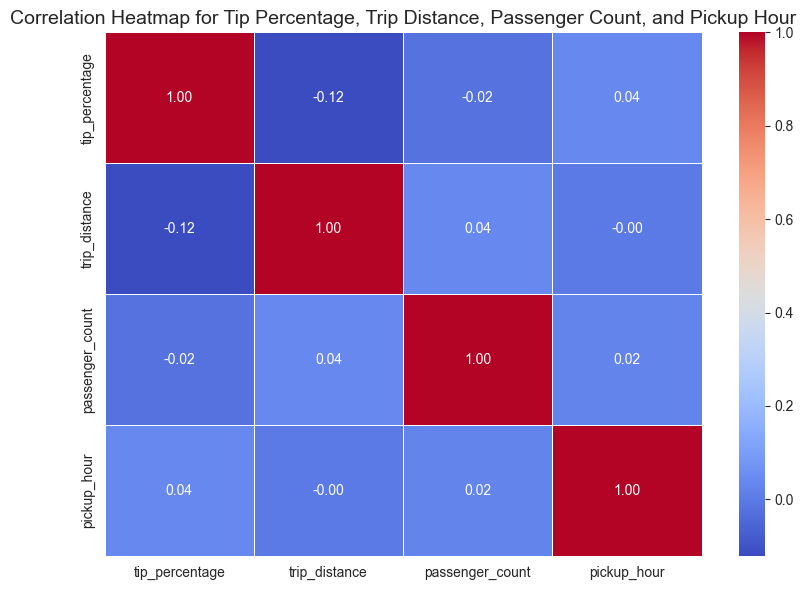

In [81]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df6 = df5[(df['tip_amount'] > 0) & (df['tip_amount'] < 40)]
df6['tip_percentage'] = (df6['tip_amount'] / df6['fare_amount']) * 100


avg_tip_distance = df6.groupby('trip_distance')['tip_percentage'].mean().reset_index()

avg_tip_passenger_count = df6.groupby('passenger_count')['tip_percentage'].mean().reset_index()


avg_tip_hour = df6.groupby('pickup_hour')['tip_percentage'].mean().reset_index()


plt.figure(figsize=(20, 6))
avg_tip_distance.plot(kind='line', x='trip_distance', y='tip_percentage', marker='o', color='skyblue')
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Tip Percentage')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
avg_tip_passenger_count.plot(kind='bar', x='passenger_count', y='tip_percentage', color='lightgreen')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
avg_tip_hour.plot(kind='line', x='pickup_hour', y='tip_percentage', marker='o', color='orange')
plt.title('Average Tip Percentage by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tip Percentage')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = df6[['tip_percentage', 'trip_distance', 'passenger_count', 'pickup_hour']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


plt.title('Correlation Heatmap for Tip Percentage, Trip Distance, Passenger Count, and Pickup Hour', fontsize=14)
plt.tight_layout()
plt.show()




Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

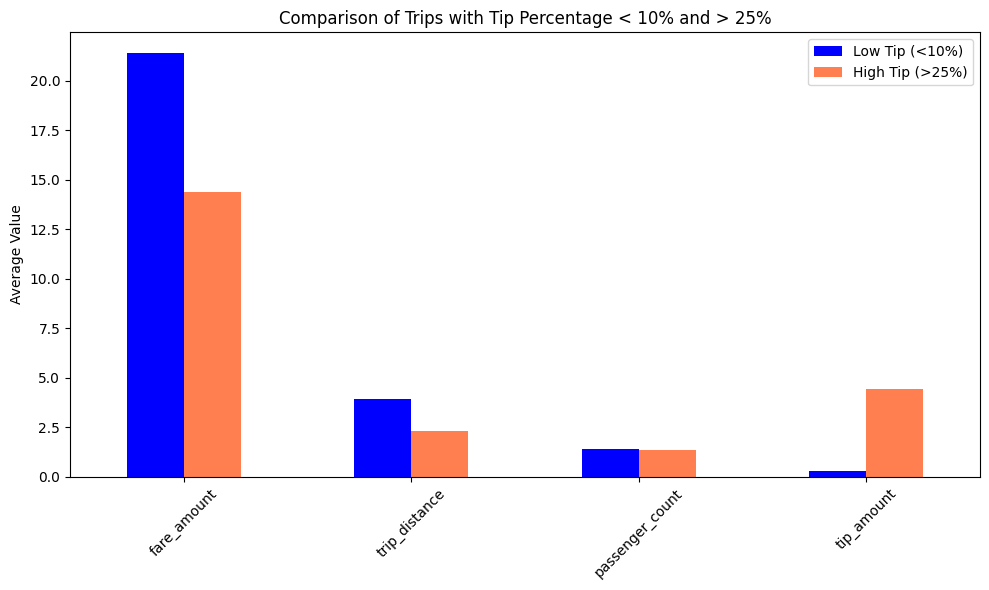

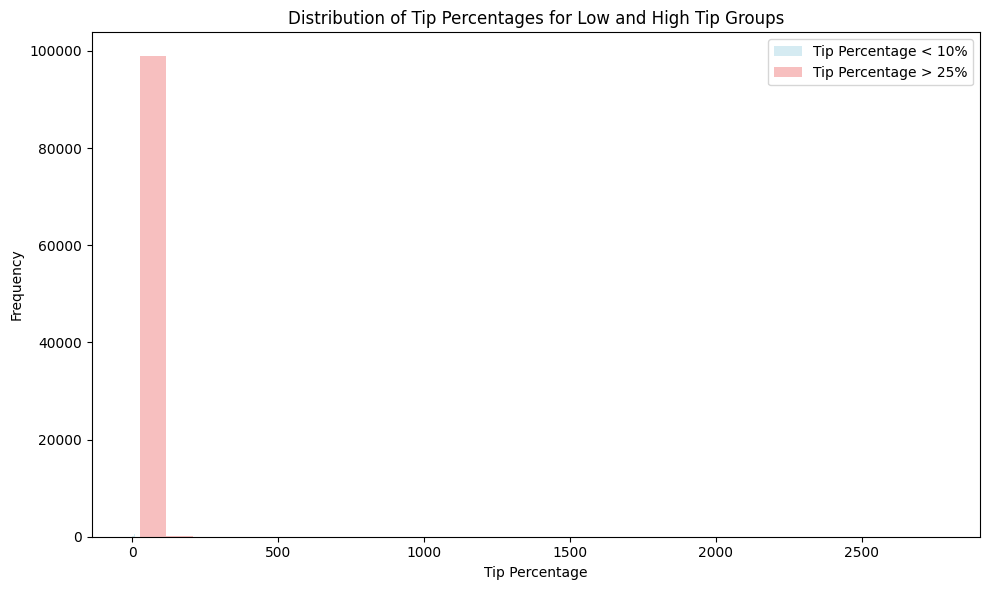

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%  Filter trips with tip percentage < 10% and tip percentage > 25%
low_tip = df6[df6['tip_percentage'] < 10]
high_tip = df6[df6['tip_percentage'] > 25]
low_tip_stats = low_tip[['fare_amount', 'trip_distance', 'passenger_count', 'tip_amount']].mean()
high_tip_stats = high_tip[['fare_amount', 'trip_distance', 'passenger_count', 'tip_amount']].mean()


comparison_df = pd.DataFrame({
    'Low Tip (<10%)': low_tip_stats,
    'High Tip (>25%)': high_tip_stats
})

comparison_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'coral'])
plt.title('Comparison of Trips with Tip Percentage < 10% and > 25%')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(low_tip['tip_percentage'], bins=30, alpha=0.5, label='Tip Percentage < 10%', color='lightblue')
plt.hist(high_tip['tip_percentage'], bins=30, alpha=0.5, label='Tip Percentage > 25%', color='lightcoral')
plt.title('Distribution of Tip Percentages for Low and High Tip Groups')
plt.xlabel('Tip Percentage')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [366]:
df5.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_hour', 'pickup_days',
       'pickup_month', 'travel_duration', 'quarter', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry',
       'pickup_datetime', 'dropoff_datetime', 'speed', 'day_of_week',
       'day_type', 'fare_per_mile', 'fare_per_mile_per_passenger',
       'day_of_week_name', 'distance_bracket'],
      dtype='object')

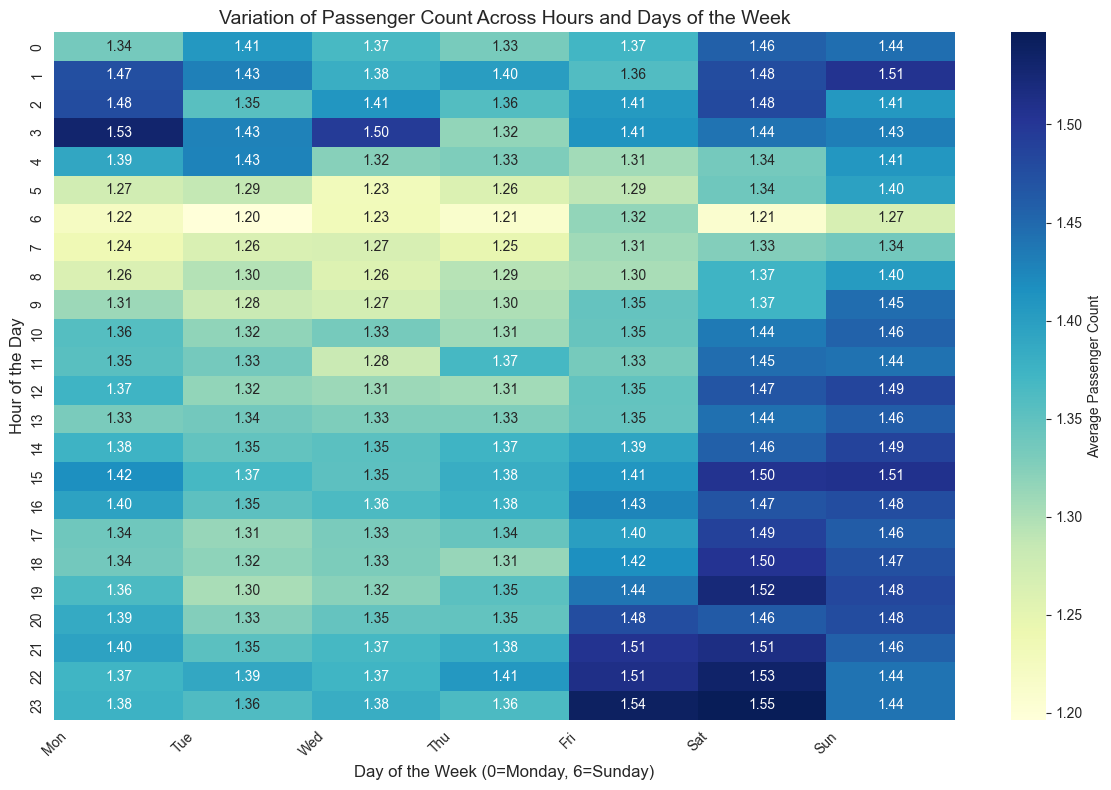

In [ ]:
# See how passenger count varies across hours and days


df5['pickup_day_of_week'] = df5['pickup_datetime'].dt.dayofweek 


avg_passenger_hour_day = df5.groupby(['pickup_hour', 'pickup_day_of_week'])['passenger_count'].mean().reset_index()


heatmap_data = avg_passenger_hour_day.pivot(index='pickup_hour', columns='pickup_day_of_week', values='passenger_count')


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Average Passenger Count'})
plt.title('Variation of Passenger Count Across Hours and Days of the Week', fontsize=14)
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)', fontsize=12)
plt.ylabel('Hour of the Day', fontsize=12)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.tight_layout()
plt.show()




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [368]:
df5[df5['passenger_count']==0].shape

(0, 40)

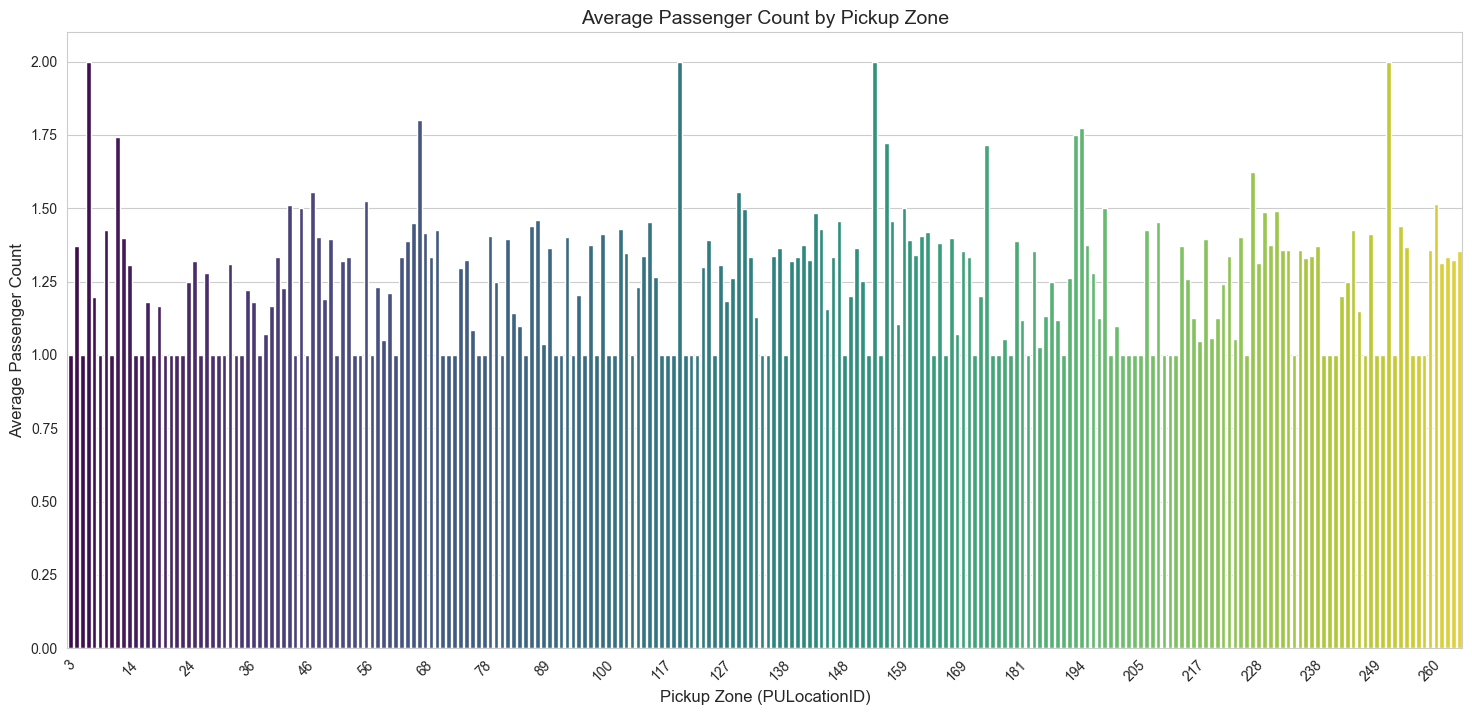

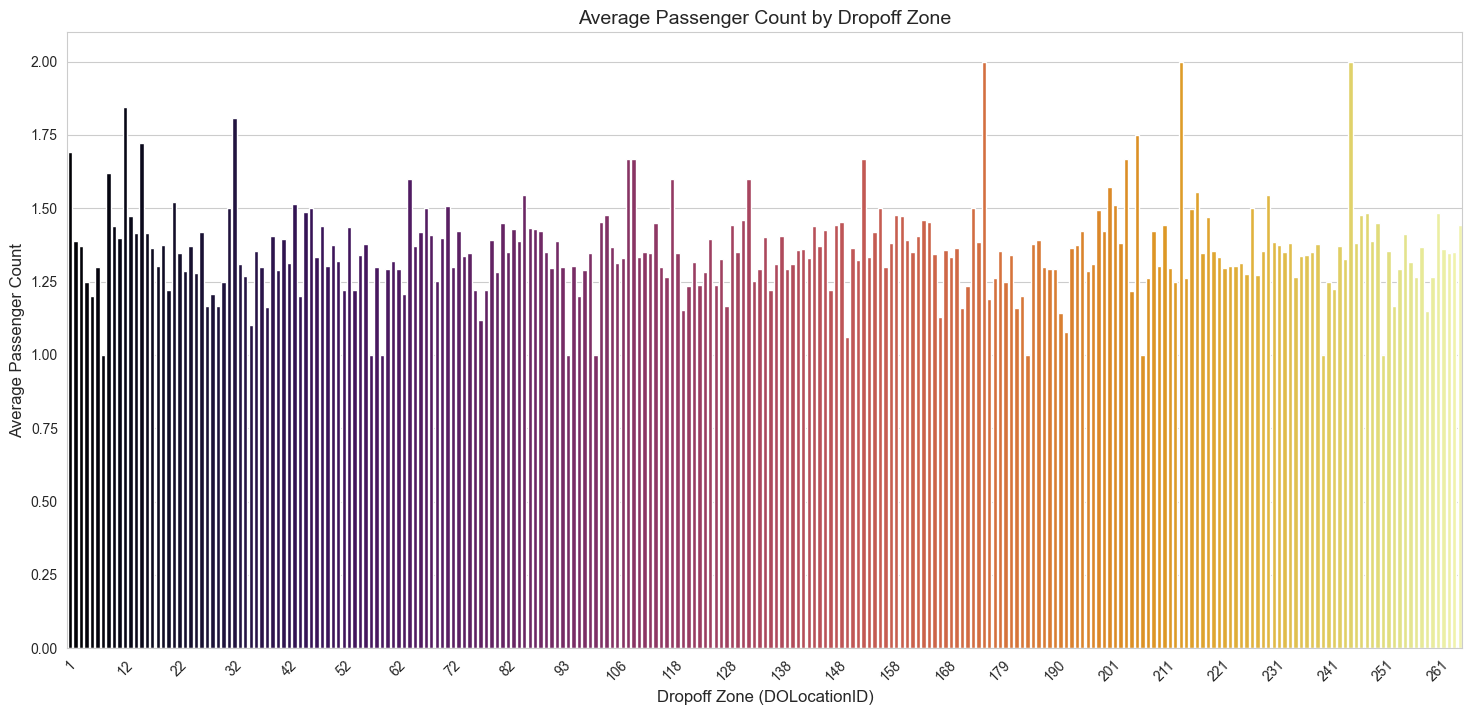

In [93]:
# How does passenger count vary across zones


avg_passenger_pickup_zone = df5.groupby('PULocationID')['passenger_count'].mean().reset_index()


avg_passenger_dropoff_zone = df5.groupby('DOLocationID')['passenger_count'].mean().reset_index()



plt.figure(figsize=(18, 8))
sns.barplot(data=avg_passenger_pickup_zone, x='PULocationID', y='passenger_count', palette='viridis')
plt.title('Average Passenger Count by Pickup Zone', fontsize=14)
plt.xlabel('Pickup Zone (PULocationID)', fontsize=12)
plt.xticks(ticks=range(0, len(avg_passenger_pickup_zone), 10), 
           labels=avg_passenger_pickup_zone['PULocationID'][::10], 
           rotation=45)
plt.ylabel('Average Passenger Count', fontsize=12)


plt.figure(figsize=(18, 8))
sns.barplot(data=avg_passenger_dropoff_zone, x='DOLocationID', y='passenger_count', palette='inferno')
plt.title('Average Passenger Count by Dropoff Zone', fontsize=14)
plt.xlabel('Dropoff Zone (DOLocationID)', fontsize=12)
plt.xticks(ticks=range(0, len(avg_passenger_dropoff_zone), 10), 
           labels=avg_passenger_dropoff_zone['DOLocationID'][::10], 
           rotation=45)
plt.ylabel('Average Passenger Count', fontsize=12)

plt.show()





In [94]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame


avg_passenger_count_by_zone = df5.groupby('PULocationID')['passenger_count'].mean().reset_index()


zones_with_trips = zones.merge(avg_passenger_count_by_zone, 
                                          left_on='LocationID', 
                                          right_on='PULocationID', 
                                          how='left')


zones_with_trips['avg_passenger_count'] = zones_with_trips['passenger_count']


zones_with_trips.head(20)


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0          1    0.116357    0.000782           Newark Airport           1   
1          2    0.433470    0.004866              Jamaica Bay           2   
2          3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3          4    0.043567    0.000112            Alphabet City           4   
4          5    0.092146    0.000498            Arden Heights           5   
5          6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
6          7    0.107417    0.000390                  Astoria           7   
7          8    0.027591    0.000027             Astoria Park           8   
8          9    0.099784    0.000338               Auburndale           9   
9         10    0.099839    0.000436             Baisley Park          10   
10        11    0.079211    0.000265               Bath Beach          11   
11        12    0.036661    0.000042             Battery Park          12   
12        13    0.050281    0.000149        Battery Park City          13   
13        14    0.175214    0.001382                Bay Ridge          14   
14        15    0.144336    0.000925  Bay Terrace/Fort Totten          15   
15        16    0.141292    0.000872                  Bayside          16   
16        17    0.093523    0.000323                  Bedford          17   
17        18    0.069800    0.000149             Bedford Park          18   
18        19    0.101825    0.000547                Bellerose          19   
19        20    0.051440    0.000135                  Belmont          20   

          borough                                           geometry  \
0             EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1          Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2           Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3       Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4   Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
5   Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...   
6          Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...   
7          Queens  POLYGON ((1005482.276 221686.466, 1005304.898 ...   
8          Queens  POLYGON ((1043803.993 216615.925, 1043849.708 ...   
9          Queens  POLYGON ((1044355.072 190734.321, 1044612.122 ...   
10       Brooklyn  POLYGON ((983945.076 158978.174, 984160.158 15...   
11      Manhattan  POLYGON ((979908.772 196066.565, 979980.852 19...   
12      Manhattan  POLYGON ((980801.31 201248.869, 980697.386 200...   
13       Brooklyn  POLYGON ((974794.238 174019.157, 975135.579 17...   
14         Queens  POLYGON ((1045882.129 229577.493, 1045886.158 ...   
15         Queens  POLYGON ((1048344.039 223210.621, 1048409.575 ...   
16       Brooklyn  POLYGON ((1000036.904 194829.434, 1000276.454 ...   
17          Bronx  POLYGON ((1016019.237 254945.129, 1015798.748 ...   
18         Queens  POLYGON ((1060888.899 212784.64, 1061115.169 2...   
19          Bronx  POLYGON ((1016371.834 254183.401, 1016392.376 ...   

    PULocationID  passenger_count  avg_passenger_count  
0            NaN              NaN                  NaN  
1            NaN              NaN                  NaN  
2            3.0         1.000000             1.000000  
3            4.0         1.371841             1.371841  
4            5.0         1.000000             1.000000  
5            6.0         2.000000             2.000000  
6            7.0         1.196581             1.196581  
7            NaN              NaN                  NaN  
8            9.0         1.000000             1.000000  
9           10.0         1.426829             1.426829  
10          11.0         1.000000             1.000000  
11          12.0         1.744000             1.744000  
12          13.0         1.397068             1.397068  
13          14.0         1.307692             1.307692  
14          15.0  

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [98]:
# How often is each surcharge applied?


df_extra_charges = df5[(df5['extra'] > 0) | (df5['mta_tax'] > 0) | 
                       (df5['tip_amount'] > 0) | (df5['tolls_amount'] > 0) |
                       (df5['improvement_surcharge'] > 0) | (df5['congestion_surcharge'] > 0) |
                       (df5['airport_fee'] > 0)]

# Group by pickup zone (PULocationID) and count how often a surcharge is applied
pickup_zone_analysis = df_extra_charges.groupby('PULocationID').agg(
    surcharge_count=('extra', 'count'),
    total_extra_charge_amount=('extra', 'sum')
).reset_index().sort_values(by='surcharge_count', ascending=False)

# Group by dropoff zone (DOLocationID) and count surcharges
dropoff_zone_analysis = df_extra_charges.groupby('DOLocationID').agg(
    surcharge_count=('extra', 'count'),
    total_extra_charge_amount=('extra', 'sum')
).reset_index().sort_values(by='surcharge_count', ascending=False)

# Group by pickup hour to analyze surcharge frequency
pickup_hour_analysis = df_extra_charges.groupby('pickup_hour').agg(
    surcharge_count=('extra', 'count'),
    total_extra_charge_amount=('extra', 'sum')
).reset_index().sort_values(by='surcharge_count', ascending=False)

# Group by day of week to analyze surcharge frequency
day_of_week_analysis = df_extra_charges.groupby('day_of_week_name').agg(
    surcharge_count=('extra', 'count'),
    total_extra_charge_amount=('extra', 'sum')
).reset_index().sort_values(by='surcharge_count', ascending=False)

# Calculate percentage of trips with each surcharge applied
total_trips = len(df5)
extra_charges_pct = (df5[df5['extra'] > 0].shape[0] / total_trips) * 100
mta_tax_pct = (df5[df5['mta_tax'] > 0].shape[0] / total_trips) * 100
tip_amount_pct = (df5[df5['tip_amount'] > 0].shape[0] / total_trips) * 100
tolls_amount_pct = (df5[df5['tolls_amount'] > 0].shape[0] / total_trips) * 100
improvement_surcharge_pct = (df5[df5['improvement_surcharge'] > 0].shape[0] / total_trips) * 100
congestion_surcharge_pct = (df5[df5['congestion_surcharge'] > 0].shape[0] / total_trips) * 100
airport_fee_pct = (df5[df5['airport_fee'] > 0].shape[0] / total_trips) * 100

# Display the results
{
    "extra_charges_pct": extra_charges_pct,
    "mta_tax_pct": mta_tax_pct,
    "tip_amount_pct": tip_amount_pct,
    "tolls_amount_pct": tolls_amount_pct,
    "improvement_surcharge_pct": improvement_surcharge_pct,
    "congestion_surcharge_pct": congestion_surcharge_pct,
    "airport_fee_pct": airport_fee_pct
}




{'extra_charges_pct': 62.322640345465764,
 'mta_tax_pct': 99.43952947114576,
 'tip_amount_pct': 78.28185463518591,
 'tolls_amount_pct': 8.051287084291403,
 'improvement_surcharge_pct': 99.99929897369749,
 'congestion_surcharge_pct': 93.03390163198924,
 'airport_fee_pct': 8.7347877292356}

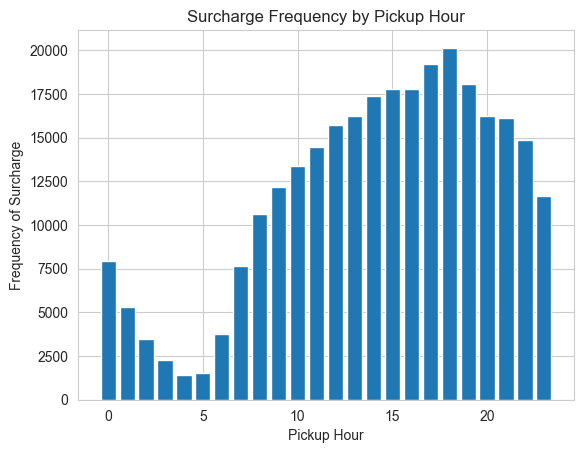

In [96]:
plt.bar(pickup_hour_analysis['pickup_hour'], pickup_hour_analysis['surcharge_count'])
plt.xlabel('Pickup Hour')
plt.ylabel('Frequency of Surcharge')
plt.title('Surcharge Frequency by Pickup Hour')
plt.show()

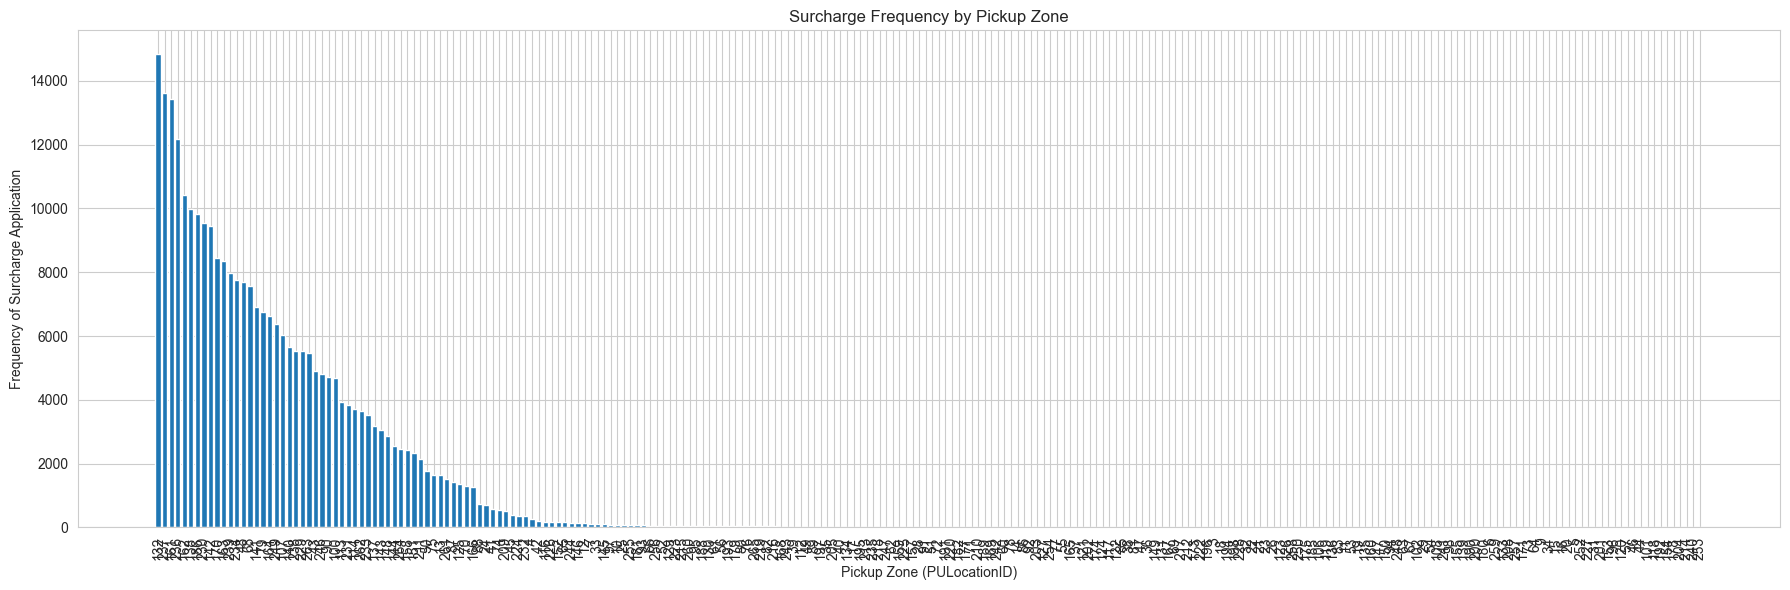

In [100]:


# Group by PULocationID and count surcharges
pickup_zone_analysis = df_extra_charges.groupby('PULocationID').agg(
    surcharge_count=('extra', 'count'),
    total_extra_charge_amount=('extra', 'sum')
).reset_index().sort_values(by='surcharge_count', ascending=False)


plt.figure(figsize=(18, 6))
plt.bar(pickup_zone_analysis['PULocationID'].astype(str), pickup_zone_analysis['surcharge_count'])
plt.xlabel('Pickup Zone (PULocationID)')
plt.ylabel('Frequency of Surcharge Application')
plt.title('Surcharge Frequency by Pickup Zone')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


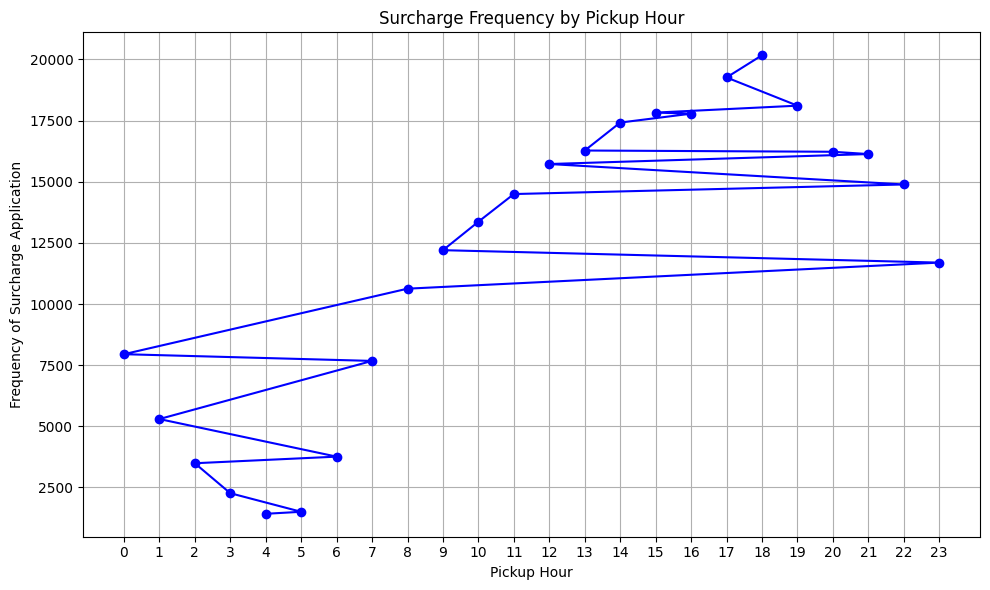

In [381]:
# Group by pickup hour and count surcharges
pickup_hour_analysis = df_extra_charges.groupby('pickup_hour').agg(
    surcharge_count=('extra', 'count'),
    total_extra_charge_amount=('extra', 'sum')
).reset_index().sort_values(by='surcharge_count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pickup_hour_analysis['pickup_hour'], pickup_hour_analysis['surcharge_count'], marker='o', color='b')
plt.xlabel('Pickup Hour')
plt.ylabel('Frequency of Surcharge Application')
plt.title('Surcharge Frequency by Pickup Hour')
plt.grid(True)
plt.xticks(range(24))  # 24 hours of the day
plt.tight_layout()
plt.show()


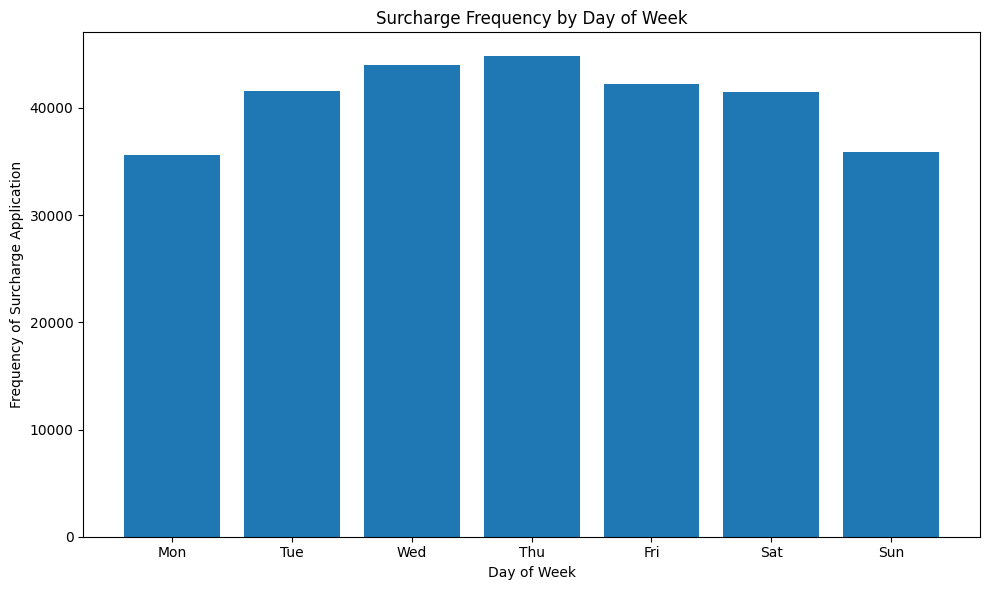

In [382]:
# Group by day of week and count surcharges
day_of_week_analysis = df_extra_charges.groupby('day_of_week').agg(
    surcharge_count=('extra', 'count'),
    total_extra_charge_amount=('extra', 'sum')
).reset_index().sort_values(by='surcharge_count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_analysis['day_of_week'], day_of_week_analysis['surcharge_count'])
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Surcharge Application')
plt.title('Surcharge Frequency by Day of Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()


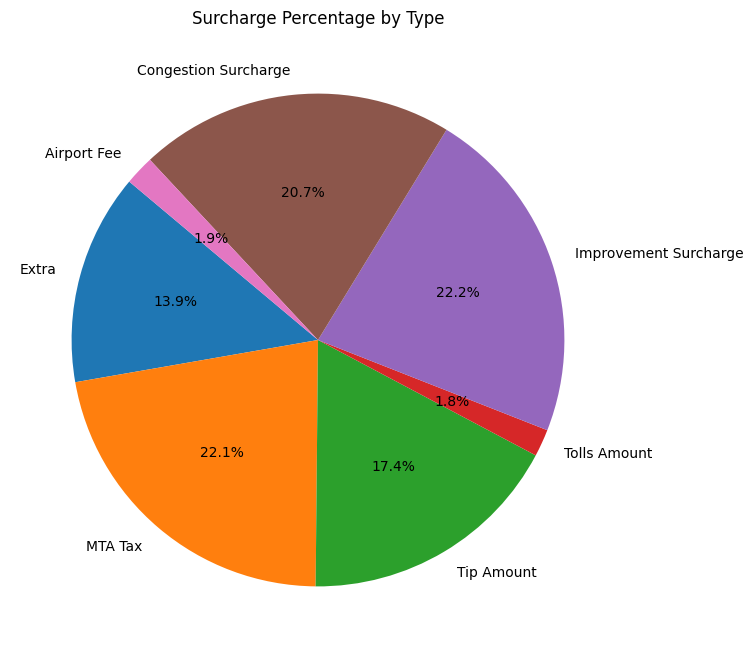

In [383]:
# Calculate percentage of trips with each surcharge applied
surcharge_counts = {
    'Extra': (df5[df5['extra'] > 0].shape[0] / total_trips) * 100,
    'MTA Tax': (df5[df5['mta_tax'] > 0].shape[0] / total_trips) * 100,
    'Tip Amount': (df5[df5['tip_amount'] > 0].shape[0] / total_trips) * 100,
    'Tolls Amount': (df5[df5['tolls_amount'] > 0].shape[0] / total_trips) * 100,
    'Improvement Surcharge': (df5[df5['improvement_surcharge'] > 0].shape[0] / total_trips) * 100,
    'Congestion Surcharge': (df5[df5['congestion_surcharge'] > 0].shape[0] / total_trips) * 100,
    'Airport Fee': (df5[df5['airport_fee'] > 0].shape[0] / total_trips) * 100
}

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(surcharge_counts.values(), labels=surcharge_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Surcharge Percentage by Type')
plt.show()


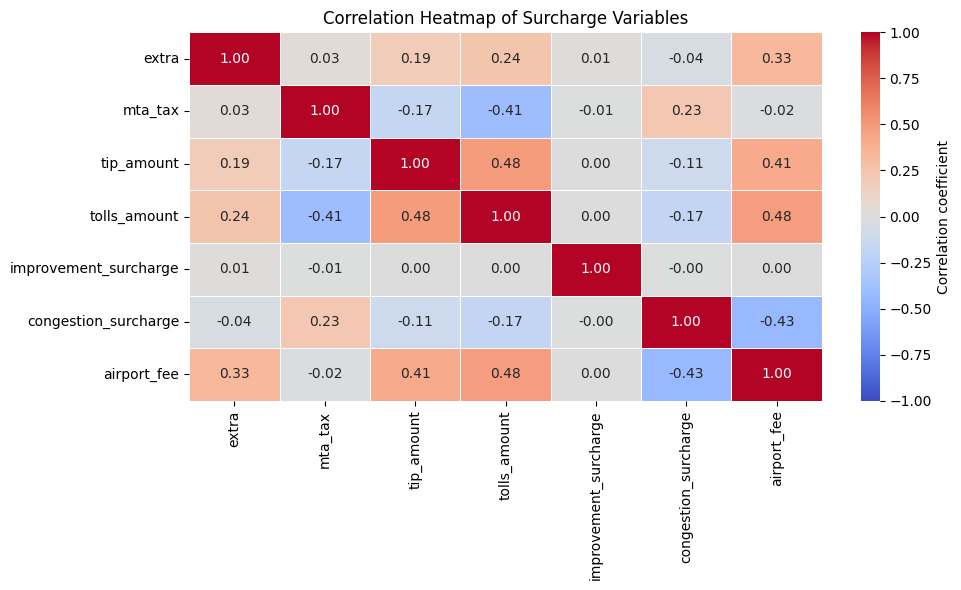

In [388]:


# Select the surcharge columns
surcharge_columns = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 
                     'congestion_surcharge', 'airport_fee']

# Subset the dataframe to include only the surcharge columns
surcharge_data = df5[surcharge_columns]

# Calculate the correlation matrix
correlation_matrix = surcharge_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5, 
            fmt='.2f', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Heatmap of Surcharge Variables')
plt.tight_layout()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

•	Mornings: Business districts (Midtown, Wall Street, Penn Station).
•	Evenings: Residential areas (Upper East Side, Brooklyn, Queens).
•	Nighttime: Entertainment hubs (Times Square, Theatre District, Lower East Side).
•	Many taxis return empty after drop-offs, especially from long-distance rides like airport trips : Assign return-trip passengers to taxis leaving airports and suburban areas. Encourage taxis to remain in high-demand areas rather than aimlessly searching for passengers.
•	Congestion delays affect taxi efficiency, especially in Manhattan during peak hours: 
•	Equip taxis with live traffic monitoring systems to avoid gridlocked areas. Work with city authorities to create dedicated taxi lanes during peak hours.
•	Demand spikes during rush hours and nightlife hours lead to taxi shortages : Offer higher commissions or surge pricing bonuses for drivers operating during high-demand times. Adjust fare rates in real time based on demand levels to balance taxi distribution.
•	Most taxi rides are solo, leading to inefficient vehicle usage and increased congestion : Offer reduced fares for passengers traveling in the same direction. Give faster dispatch priority to shared ride requests to optimize taxi usage.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

•	Allocate taxis near major office zones like Midtown, Wall Street, Upper East Side. Ensure high taxi availability at airports & train stations between 4 AM - 9 AM for early commuters. Shift taxis toward high-traffic tourist locations. Position taxis around shopping areas and hotels to serve midday travelers. 
•	Deploy more taxis in nightlife districts between 9 PM - 3 AM. Ensure steady availability of taxis at JFK & LaGuardia between 10 PM - 2 AM for night travelers.
•	Prioritize nightlife zones on Friday & Saturday nights to handle peak demand. Increase airport taxi availability on Sundays (3 PM - 8 PM) for returning travelers.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

•	High ride demand during rush hours (7 AM - 10 AM & 5 PM - 8 PM) leads to increased wait times and ride shortages. Late-night weekend demand spikes (10 PM - 3 AM) in nightlife zones cause fare surges due to limited supply. To solve this Increase fares during rush hours (10-15% premium) to encourage more drivers to operate. Nighttime surge pricing (15-20% increase) in entertainment districts like Times Square and Meatpacking District.
•	Short-distance trips (0-2 miles) have the highest fare per mile, making them costly for riders. Many passengers opt for walking or public transport instead of paying high base fares. To fix this Reduce the minimum fare slightly to attract more short-trip riders. Introduce short-distance ride promotions
•	Airport fares (JFK, LaGuardia) are expensive compared to fixed-rate rideshares. Introduce competitive flat fares for common long-distance routes. Offer discounted rates for return trips to reduce empty miles.
•	Implement upfront fare estimates in taxi apps to increase transparency to address trust issues compared to fixed-rate rideshares.
